In [ ]:
# call the library

# to generate data processing and visualization tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dimensionality reduction
from sklearn.manifold import TSNE

# **Load Dataset**

In [2]:
# the vectorization of textual data done by tf-idf
drug_reviews_tfidf_positive = pd.read_csv('positive reviews with labels.csv')
drug_reviews_tfidf_negative = pd.read_csv('negative reviews with labels.csv')

# the textual data processed by ada-002
drug_reviews_embeddings_positive = pd.read_csv('positive reviews embedding with labels.csv')
drug_reviews_embeddings_negative = pd.read_csv('negative reviews embedding with labels.csv')

In [3]:
drug_reviews_tfidf_positive.head()

,drugName,condition,review,rating,usefulCount,side effects,effectiveness,side_effects_labels,effectiveness_labels
0,guanfacine,adhd,"""my son is halfway through his fourth week of ...",8,192,could hardly get out of bed very cranky slept ...,much more agreeable overall his behavior is be...,-1,-1
1,buprenorphine / naloxone,opiate dependence,"""suboxone has completely turned my life around...",9,37,minimal side-effects slight constipation sleep...,completely turned my life around feel healthie...,-1,-1
2,aripiprazole,bipolar disorde,"""abilify changed my life. there is hope. i was...",10,32,like to eat a lot,changed my life there is hope feel like I have...,-1,-1
3,topiramate,migraine prevention,"""i have been on this medication almost two wee...",9,19,weight loss recall issues memory issues vision...,no headaches crippling migraines reduced lost ...,-1,-1
4,l-methylfolate,depression,"""i have taken anti-depressants for years, with...",10,54,moderate to severe side effects no side effects,some improvement major improvement overnight m...,-1,-1


In [4]:
drug_reviews_tfidf_negative.head()

,drugName,condition,review,rating,usefulCount,side effects,effectiveness,side_effects_labels,effectiveness_labels
0,toradol,pain,"""i am 30 years old. i had a multiple composite...",10,16,aches pains bad days,function again almost off all pain meds,-1,-1
1,morphine,pain,"""i have been on morphine for at least 7 years....",8,19,no side effects reported,manage my pain only medicine without it I woul...,0,-1
2,symbyax,bipolar disorde,"""helps against sadness, and strongly counters ...",8,22,no side effects reported,helps against sadness strongly counters modera...,0,-1
3,doxycycline,urinary tract infection,"""i battled a nasty uti for over a month &amp; ...",7,44,terribly sick to your stomach,completely worth it felt completely back to no...,-1,-1
4,amitiza,"constipation, drug induced","""i had a tummy tuck on dec 18. the surgery was...",10,35,painful surgery constipation from opioids opio...,amitiza worked so well amazing results no issu...,-1,-1


In [5]:
drug_reviews_embeddings_positive.head()

,drugName,condition,review,rating,usefulCount,side effects,effectiveness,side effects labels,effectiveness labels
0,guanfacine,adhd,"""my son is halfway through his fourth week of ...",8,192,could hardly get out of bed very cranky slept ...,much more agreeable overall his behavior is be...,-1,-1
1,buprenorphine / naloxone,opiate dependence,"""suboxone has completely turned my life around...",9,37,minimal side-effects slight constipation sleep...,completely turned my life around feel healthie...,-1,-1
2,aripiprazole,bipolar disorde,"""abilify changed my life. there is hope. i was...",10,32,like to eat a lot,changed my life there is hope feel like I have...,-1,-1
3,topiramate,migraine prevention,"""i have been on this medication almost two wee...",9,19,weight loss recall issues memory issues vision...,no headaches crippling migraines reduced lost ...,-1,-1
4,l-methylfolate,depression,"""i have taken anti-depressants for years, with...",10,54,moderate to severe side effects no side effects,some improvement major improvement overnight m...,-1,-1


In [6]:
drug_reviews_embeddings_negative.head()

,drugName,condition,review,rating,usefulCount,side effects,effectiveness,side effect labels,effectiveness labels
0,toradol,pain,"""i am 30 years old. i had a multiple composite...",10,16,aches pains bad days,function again almost off all pain meds,-1,-1
1,morphine,pain,"""i have been on morphine for at least 7 years....",8,19,no side effects reported,manage my pain only medicine without it I woul...,0,-1
2,symbyax,bipolar disorde,"""helps against sadness, and strongly counters ...",8,22,no side effects reported,helps against sadness strongly counters modera...,0,-1
3,doxycycline,urinary tract infection,"""i battled a nasty uti for over a month &amp; ...",7,44,terribly sick to your stomach,completely worth it felt completely back to no...,-1,-1
4,amitiza,"constipation, drug induced","""i had a tummy tuck on dec 18. the surgery was...",10,35,painful surgery constipation from opioids opio...,amitiza worked so well amazing results no issu...,-1,-1


## **Get Cluster Information**

In [8]:
def cluster_counts(df, side_cluster_col, effect_cluster_col):
    """
    Return value counts (number of samples) for side effects and effectiveness clusters.

    Parameters:
    - df: pandas DataFrame
    - side_cluster_col: column name for side effects cluster labels
    - effect_cluster_col: column name for effectiveness cluster labels

    Returns:
    - side_counts: Series of counts per side effects cluster
    - effect_counts: Series of counts per effectiveness cluster
    """

    side_counts = df[side_cluster_col].value_counts().sort_index()
    effect_counts = df[effect_cluster_col].value_counts().sort_index()
    
    return side_counts, effect_counts

In [16]:
side_counts, effect_counts = cluster_counts(
    df=drug_reviews_tfidf_positive,
    side_cluster_col='side_effects_labels',
    effect_cluster_col='effectiveness_labels'
)

print("Cluster Counts for Positive Reviews:\n")
print("Side Effects Cluster Counts:")
print(side_counts)

print("\nEffectiveness Cluster Counts:")
print(effect_counts)

Cluster Counts for Positive Reviews:

Side Effects Cluster Counts:
side_effects_labels
-1    44739
 0    11333
 1     1894
 2      161
 3      288
 4      145
 5      110
 6      202
 7      191
 8      103
Name: count, dtype: int64

Effectiveness Cluster Counts:
effectiveness_labels
-1    58362
 0       33
 1      128
 2       97
 3      237
 4       37
 5      132
 6       65
 7       42
 8       33
Name: count, dtype: int64


In [18]:
side_counts, effect_counts = cluster_counts(
    df=drug_reviews_tfidf_negative,
    side_cluster_col='side_effects_labels',
    effect_cluster_col='effectiveness_labels'
)

print("Cluster Counts for Negative Reviews:\n")

print("Side Effects Cluster Counts:")
print(side_counts)

print("\nEffectiveness Cluster Counts:")
print(effect_counts)

Cluster Counts for Negative Reviews:

Side Effects Cluster Counts:
side_effects_labels
-1    16403
 0     2502
 1       72
 2      470
 3       76
 4       77
Name: count, dtype: int64

Effectiveness Cluster Counts:
effectiveness_labels
-1    19257
 0      108
 1       33
 2      123
 3       25
 4       26
 5       28
Name: count, dtype: int64


In [19]:
side_counts, effect_counts = cluster_counts(
    df=drug_reviews_embeddings_positive,
    side_cluster_col='side effects labels',
    effect_cluster_col='effectiveness labels'
)

print("Cluster Counts for Positive Reviews:\n")

print("Side Effects Cluster Counts:")
print(side_counts)

print("\nEffectiveness Cluster Counts:")
print(effect_counts)

Cluster Counts for Positive Reviews:

Side Effects Cluster Counts:
side effects labels
-1    45651
 0    11123
 1     1430
 2      110
 3      285
 4      142
 5      195
 6      130
 7      100
Name: count, dtype: int64

Effectiveness Cluster Counts:
effectiveness labels
-1    58684
 0      303
 1       84
 2       51
 3       44
Name: count, dtype: int64


In [20]:
side_counts, effect_counts = cluster_counts(
    df=drug_reviews_embeddings_negative,
    side_cluster_col='side effect labels',
    effect_cluster_col='effectiveness labels'
)

print("Cluster Counts for Negative Reviews:\n")
print("Side Effects Cluster Counts:")
print(side_counts)

print("\nEffectiveness Cluster Counts:")
print(effect_counts)

Cluster Counts for Negative Reviews:

Side Effects Cluster Counts:
side effect labels
-1    16576
 0     2416
 1       41
 2      324
 3       74
 4       30
 5       31
 6       36
 7       41
 8       31
Name: count, dtype: int64

Effectiveness Cluster Counts:
effectiveness labels
-1    19405
 0       73
 1       65
 2       57
Name: count, dtype: int64


# **Visualize Cluster**

In [3]:
positive_svd_side_effects = np.load('positive_svd_side_effects.npy')
positive_svd_effectiveness = np.load('positive_svd_effectiveness.npy')
negative_svd_side_effects = np.load('negative_svd_side_effects.npy')
negative_svd_effectiveness = np.load('negative_svd_effectiveness.npy')

In [4]:
def tsne_3d_visualization(data, title, df, column_name, perplexity=30, n_iter=300, random_state=42):
    """
    Generate a 3D t-SNE visualization of clustered data.

    Parameters:
        data (array-like): The feature matrix to apply t-SNE.
        title (str): Title of the plot.
        df (DataFrame): DataFrame containing cluster labels.
        column_name (str): The column in df with cluster labels.
        perplexity (int): t-SNE perplexity.
        n_iter (int): Number of iterations for optimization.
        random_state (int): Seed for reproducibility.
    """
    print(f"Running TSNE for: {title}...")

    # 3D t-SNE transformation
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iter, init="random", random_state=random_state)
    data_tsne_3d = tsne.fit_transform(data)

    print("TSNE complete.")

    # determine limits
    maximum = data_tsne_3d.max()
    minimum = data_tsne_3d.min()

    # 3D scatter plot
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        data_tsne_3d[:, 0],
        data_tsne_3d[:, 1],
        data_tsne_3d[:, 2],
        c=df[column_name],
        cmap='viridis'
    )

    ax.set_title(f"3D TSNE Visualization - {title}")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")

    ax.set_xlim(minimum, maximum)
    ax.set_ylim(minimum, maximum)
    ax.set_zlim(minimum, maximum)

    # # Add legend
    # unique_labels = np.unique(df[column_name])
    # legend_elements = [
    #     Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
    #            markerfacecolor=plt.cm.tab10(i % 10), markersize=8)
    #     for i, label in enumerate(unique_labels)
    # ]
    # ax.legend(handles=legend_elements, title="Clusters", loc='best')

    plt.tight_layout()
    plt.show()


## **TF-IDF**

Running TSNE for: Positive Side Effects...
TSNE complete.


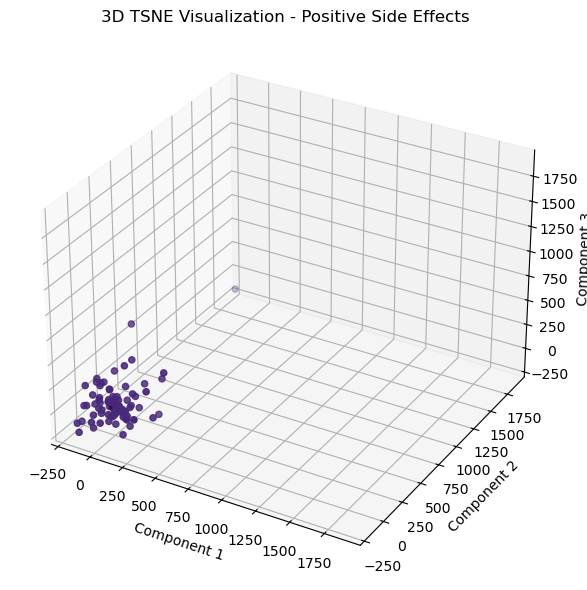

In [6]:
tsne_3d_visualization(
    data=positive_svd_side_effects,
    title="Positive Side Effects",
    df=drug_reviews_tfidf_positive,
    column_name='side_effects_labels'
)

In [ ]:
tsne_3d_visualization(
    data=positive_svd_effectiveness,
    title="Positive Side Effects",
    df=drug_reviews_tfidf_positive,
    column_name='effectiveness_labels'
)

In [ ]:
tsne_3d_visualization(
    data=negative_svd_side_effects,
    title="Negative Side Effects",
    df=drug_reviews_tfidf_negative,
    column_name='side_effects_labels'
)

In [ ]:
tsne_3d_visualization(
    data=negative_svd_effectiveness,
    title="Negative Effectiveness",
    df=drug_reviews_tfidf_negative,
    column_name='effectiveness_labels'
)

## **Text Embedding**

In [ ]:
positive_side_effects = np.load("positive_side_effects.npy")
positive_effectiveness = np.load("positive_effectiveness.npy")
negative_side_effects = np.load("negative_side_effects.npy")
negative_effectiveness = np.load("negative_effectiveness.npy")

In [ ]:
tsne_3d_visualization(
    data=positive_side_effects,
    title="Positive Side Effects",
    df=drug_reviews_embeddings_positive,
    column_name='side effects labels'
)

In [ ]:
tsne_3d_visualization(
    data=positive_effectiveness,
    title="Positive Effectiveness",
    df=drug_reviews_embeddings_positive,
    column_name='effectiveness labels'
)

In [ ]:
tsne_3d_visualization(
    data=negative_side_effects,
    title="Negative Side Effects",
    df=drug_reviews_embeddings_negative,
    column_name='side effect labels'
)

In [ ]:
tsne_3d_visualization(
    data=negative_effectiveness,
    title="Negative Effectiveness",
    df=drug_reviews_embeddings_negative,
    column_name='effectiveness labels'
)

# **Get Side Effects and Effectiveness Based On Cluster Labels**

In [70]:
def extract_unique_terms_per_cluster(df, cluster_col, text_col, delimiter=',', exclude_outlier=False, only_outlier=False):
    """
    Extract first-time-seen terms within each cluster row-by-row.

    Parameters:
    - df: pandas DataFrame
    - cluster_col: str, column with cluster labels
    - text_col: str, column with comma-separated terms
    - delimiter: str, delimiter between terms (default ',')
    - exclude_outlier: bool, if True excludes Cluster -1
    - only_outlier: bool, if True returns only Cluster -1

    Returns:
    - dict: { 'Cluster X': [terms] }
    """
    
    cluster_terms = {}

    # Filter based on flags
    if exclude_outlier:
        df = df[df[cluster_col] != -1]
    elif only_outlier:
        df = df[df[cluster_col] == -1]

    for cluster, group in df.groupby(cluster_col):
        seen = set()
        terms = []

        for row in group[text_col].fillna(''):
            row_terms = [t.strip().lower() for t in row.split(delimiter)]
            new_terms = [t for t in row_terms if t not in seen]
            seen.update(new_terms)
            terms.extend(new_terms)

        cluster_terms[f'Cluster {cluster}'] = terms

    return cluster_terms


In [71]:
pd.set_option('display.max_colwidth', None)

## **TF_IDF**

### **Positive**

In [101]:
positive_side_effects_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_positive,
    cluster_col='side_effects_labels',
    text_col='side effects',
    exclude_outlier=True
)

positive_effectiveness_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_positive,
    cluster_col='effectiveness_labels',
    text_col='effectiveness',
    exclude_outlier=True
)

In [73]:
pd.DataFrame([positive_side_effects_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,"[no side effects reported, few if any, none, activating, unnoticed, stubbornness defiance, pseudofolliculitis, less-hungry, clingy bashful quiet, more talkative, pe is gone, out of it, pessimistic side, augmentation, furious, dye additives, chattier, sleepier, more potent never take all three together, tardive dyskinesia, no sides, bleaches sheets bleaches pillows bleaches towels, negligible, financial hardship, few any, mouthy, twitchy, hypervigilant, miscarriage, not the nicest tabs to take, caregiver's burnout, none since he's been taking it no exacerbation since then, pricey, meaner, tendonitis deplete magnesium, shat myself, dozed out, less argumentative, hyperglycemia, gave out, pcos, overuse, alopecia, miscarried conjoined twins, any cons meaningless, mellows me, shakie, livable, regret from not taking it sooner, cautious, no withdrawls, too much, hyperhidrosis, not cry as much, wooziness, freckles, can be misused, narc part, mundane, arachnoiditis, urticarial vasculitis gastroparesis, we will see, no mojo marriage did not survive, sides, cry, none of those worked, no avail, never take all three together, hassles must be refrigerated, leary, fidgety, copd, character defects, too focused, pooped out activating, astigmatism, furious griped, drowiness, dull-witted stupid, conflict inhuman, hysterics, haze, complacency too choosy, not perfect, blasting out my arse pooping, dystonia, cotton-mouth, nothing serious, not particular fond of, no feelings no nothing, hemorrhaging from vagina, impotent, must be refrigerated, limitations, i have not had any, burping, foolish, dodgy, hungrier, did nothing, ...]","[no side effects, side effects soma, no side effect, no side effects at all, no side effects as of yet, fewest side effects, no side effects for us, no effects, side effect, 0 side effects, side effects no side effects, side effects, many many side effects, no side effects yet, some side effect, no side effects without any side effects, too many side effects, currently no side effects, no side effects brilliant, without side effects, no other side effects, several side effects no freaky side effects less intoxicating effects, least amount of side effects, no serious side effects, all the side effects are gone, very few side effects, no side effects minimize side effects, never had a side effect, almost no side effects, none no side effects, less side effects, no thinning no side effects, side effects gone, never had any side effects, no side effects for me, considerable side effects no side effects, no appreciable side effects, not had much side effect, never once had one side effect, some side effects learning curve, no side effects as yet, no unsavory side effects, few side effects, less side effects no side effects, no side effects for me at all, fewer side effects, all the side effects, without the side effects, several side effects side effects were gone, no side effects with me, no side effects whatever, no side effects what so ever, side effects not had any side effect, no side effects no anything, no noted side effects, least side effect, no side effects for him either, not having many side effects, side effects are there, no discernible side effects, no side effects or down sides, no side effect at all, very much side effects, no recognizable side effects, no side effect yet hopefully not at all, less side effects disruptive unemployable, no side effects from tegrotol, none of the listed side effects, side effect incur down the road, side effects toviaz enablex, some of the side effects, no side effects costly, no side effects that i can detect, chance any side effect, no side effects from amoxicillin, less side effects than viagra and cialis, cortisone side effects, no side effect comfort, few if any side effects, no recognised side effects, few to any side effects, no side effects to date, ocular side effects, none of the

In [74]:
pd.DataFrame([positive_effectiveness_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,"[effective, not effective, very effective, 100 % effective, 95% effective, measurably effective, very effective accessible, very effective found it to be very effective very effective, life savour most effective nothing is as effective as clomipramine, very much effective]","[see if it works, works well, worked well, worked for me, dipping them in honey worked, worked 100% better, may not work at all may not work very well, not working for me, works, working well, worked, it works, did nothing for me does seem to be working, worked very well, works very well, works for me, worked after nothing else, has always worked for me, never worked, it does work works, worked better, it worked, worked better omeprazole, work work better than anything else, works for me very well, still working, works too well, works for many with myasthenia gravis has worked for me, works does work very well, nothing worked it works, worked as anticipated, seems to be working, work, works very well works very well, worked working, how well its working, worked for me seemed to work, work well, not working, worked very well still works well, does not work for me, work better, none of them worked i can see that it is working]","[unbelievably good, all good, good, very good, seems to be getting better, much better now keeping well, better than anything else, doing good, much better, good very good, 90% better much better, mood/depression is much better, good for the most part, not for me much better now, for the better, good adjunct analgesics, everything seems good, better than the tamoxifen, good doing good, not as good as prilsect not comparable to aciphex, zantac, all of them, good night(day)sleep, better ones out there]","[works great, works great works well, worked great worked well, worked great, never got seasick again works great, working great, seemed to work great, works great does not work, has worked great for me, works great for me, 100% better works great, works great dysautonomia, worked great while taking it, worked great not so great worked much better works great, fluconazole works great, always works great for me, worked great works great, worked for him not one worked doing great it works, works great take 3-4, great works everytime, working great 117/73, work great, works great give you enough, worked out great for me, works great none of them works as well as the benicar, great confession worked, worked great did work, worked great on mrsa, great works well]","[feeling much better, feel good, feel better, feeling so much better, do feel better not good yet, feeling very good, feel so much better feel is good, feeling very, very good; at least 90% better, feel 100% better, feel better now was still not feeling good, feel better feel much better, feeling good, feel so much better, very good feel very well]","[no effectiveness information, got better, never take this again, 80% better, 10 out of 10, bladder_problem burning_mouth, none mentioned, exceptionally great, advil aspirin ultram, works fair, not specified, initial_readings average_reading normal_readings active_readings top_number, thorough cleansing, not explicitly mentioned, doing well, pepcid works great, great for lupus, 100% better, helps abated, great after 6 wks, tolerates this one well, not for everyone, furuncle was gone, get some mag citrate it works keep going and going, better than ever will not go through this again, done so much better with the intuniv, better, none]","[great, great at first, seems great, great for urticaria, great for me, great got the confession, it's great for me, great for backache, all was great, great evened out puts me out]","[helps very much, help, helps, helps me, helping, has helped helps depression-wise, helped hbp, has helped, helps so much, helped so much, helped, seemed to help, helps does help, helps so much wearing off, helps spina bifida, he

In [102]:
positive_side_effects_outliers = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_positive,
    cluster_col='side_effects_labels',
    text_col='side effects',
    only_outlier=True
)

positive_effectiveness_outliers = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_positive,
    cluster_col='effectiveness_labels',
    text_col='effectiveness',
    only_outlier=True
)

In [103]:
positive_side_effects_outliers

{'Cluster -1': ['could hardly get out of bed very cranky slept for nearly 8 hours less emotional',
  'minimal side-effects slight constipation sleeping better',
  'like to eat a lot',
  'weight loss recall issues memory issues vision disturbances',
  'moderate to severe side effects no side effects',
  'severe nausea dry mouth constipation',
  'kept me awake 24/7 breakthrough pain overly drowsy in the mornings',
  'lower libido sleep like a log no irritability almost no anger',
  'insomnia rebound insomnia dry mouth nasal congestion addicting',
  'none mentioned plucking stubble could be felt under skin',
  'fatigue headache',
  'diarrhea gas sulphur belching weight gain',
  'sensitivity to emotions weight fluctuation concern for well-being nervousness',
  'sex drive has completely disappeared afraid to go off it high dose of lexapro',
  'insomnia night sweats lack of sex drive poor orgasms no orgasms',
  'miss 24 hours pain starts to reside again',
  'mild drowsy tolerable',
  'weird 

In [104]:
positive_effectiveness_outliers

{'Cluster -1': ['much more agreeable overall his behavior is better most effective',
  'completely turned my life around feel healthier excelling at my job always have money in my pocket put you on the path of great life again all that is history',
  'changed my life there is hope feel like i have been cured works for me lost complete control over my emotions was golden again better than i have ever been in the past',
  'no headaches crippling migraines reduced lost 5.2lbs tons of energy great mood',
  'some improvement major improvement overnight more energy better disposition no sinking to the low lows of major depression feel like a normal person',
  'weight loss 1.8 dosage working very well lost 58 lbs',
  "relieved my pain never had pain and felt 'cured' help control my pain low manageable level allows me to have a fairly normal life",
  'manages hypomania/mania improved focus decreased impulsive thoughts feeling normal physically and emotionally less exhausted',
  'help with inte

### **Negative**

In [79]:
negative_side_effects_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_negative,
    cluster_col='side_effects_labels',
    text_col='side effects',
    exclude_outlier=True
)

negative_effectiveness_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_negative,
    cluster_col='effectiveness_labels',
    text_col='effectiveness',
    exclude_outlier=True
)

In [80]:
pd.DataFrame([negative_side_effects_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,"[no side effects reported, insomniatic, sleepier, asomnia, boils getting the boils back, achey weary, takes the estrogen out of my system, sedates me, dozy, no side effects to speak of, no hang over, too many blanks, none, estrogen removal, wore off too soon, sicker immediately, hypothyroidism, keeps me on edge, doped up, no compulsion to binge no compulsion to purge, crying weepy, pancreatitis fatal, jc virus flareup, sh** yourself, heat-flashes, no aftereffects, psychomotor retardation, none notable, akathisia, negligible pale into insignificance, overweight not very active due to a limb amputation, impatience, what not to take with it how to take it, augmentation, foul-smelling, cellulitis conjunctivitis, took me off hydrocodone took me off flexeril, lifelong hassle, hairy apprehensive, crying inappropriately, pushed down, not recommend, dyskinesia, tendonitis, testicular shrinkage, might not be for everyone, very unhealthy, overweight, fecal dis-impaction, starving by bedtime, stinky, hang over, jet lag, confused less tolerant, experienced none as of yet, ultra mellow, limping, hyomax levsin hyoscyamine sulfate, bored lonely]","[weight gain, gained some weight extreme weight gain, no weight gain, gained weight, weight gain more confrontational, no side effects at all no weight gain, gaining weight weight gain hard on my back, gain weight, weight gain resistance, weight gain upsetting, gained weight tolerant to the effects, night-sweats weight gain, no side effects weight gain, weight gain pcos, no side effects no weight gain]","[no side effects, none of the listed side effects, some side effects, no side effects none, no side effects colors being brighter, few side effects, no side effect what so ever, no side effects of note, least amount of side effects, sedative side effects, side effects, side effects contract up, too many side effects, less side effects, no discernible side effects, least side effects, no side effects that i can recognize, none no side effects, no side effects for me, no side effects at all, no side effects as of yet, not having any side effects, no craps no side effects, 0 side effects, no drastic side effects, no side effects cardiotoxicity, few if any side effects, no obvious side effects sun-sensitivity, very few side effects, no side effects that i am aware of no antidote, least side effects less side effects, sedative effect, no perceived side effects, no side effect without any side effects, no side effects observed, no side effects that i can see, no serious side effects, sedatory effect disassociated, no side effects from the lasix, no side effects may have side effects, none, no side effects pleasantly surprised, many side effects, no side effects not one side effect, no side effects being cheerful, no side effects to report, not having side effects, side effect warnings, not many side effects, weary of the side effects, no side effects what so ever, a few side effects, petrified of the side effects, side effects are all there, without the side effects, deadly side effects ciprofloxacin levaquin, no side effects as yet, pop out effect agonizing, did not have any side effects, no side effects from opana, no side effects not one, a-fib less side effects, no side effect, very serious side effects from flecainide very serious side effects from propafenone no side effects that i am aware of, no side effects to my child, no side effects put up with anything]","[dry mouth, no other side effects no dry mouth, no dry mouth no other side effects]","[no bad side effects, bad side effects, bad side effects added vitamin a, no bad side effect, side effects weren't bad at all diabetic, no bad side effects lucky, bad side effects of gabapentin no side effects from tramadol, no bad side effects more side effects than ambien, bad side effects no side effects to note, no bad effects, bad initially cope with side effects, bad side effects no side effects, p

In [81]:
pd.DataFrame([negative_effectiveness_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,"[no effectiveness information, it works for me too many blanks 4 out of 10 are blanks, it works for me 4 out of 10 are blanks, gets me going, aic went down from 9.0 to 8.0, heals mrsa inf., not explicitly mentioned, simvastatin by cobalt labs effective, cluster_headaches broken_leg broken_ribs, keeping me from going blind, not specified, getting better, do not have any angina, the complera, everything seemed to be going well, stabilizes me, none mentioned, gone, no sweating, vile putrid, vile putrid unpalatable, 80% better 100% better, serving its purpose 100%, not yet determined]","[effective, effective found it effective recommend augmentin, not effective, very effective recommended, always been effective, very effective over 95% effective effective taken within the first 24 hours, milder very effective, very effective effective, effective in inhibiting estrogen, very effective, less effective, very effective for me, very effective recommend it, very effective recommended for prophylactics against malaria]","[it worked not complaining, worked, does work, it works, works very well, works well, never worked for me, worked for me, metronidazole works bacterial vaginitis, works, it works still worked, worked well flagyl seemed the milder of the two, worked well, works for me, worked well for me, did work, working, kept me going to work, it works yes it does work, works well no af, it worked, works so well, not working, worked very well, works alright, work unlike the others, working well for me, got their daddy back it works, nothing works mobic, works for me does not work for me non-drowsy formula, flagyl worked for me before, has worked, trazodone worked well belsomra not working well, anastrozole evidently works, these work, worked rather well]","[helped with depression helped with anxiety, help depression, helping the depression sensitivity, help with depression, helped my depression helped my anxiety, helps depression, helped anxiety helped depression, helped with depression, helped with my depression, helps my depression, helped depression helped anxiety, helped with depression helped with sleeplessness]","[seems to help, helps keep me from being irritated, helped my copd, helped me steroids given with it, helped me getting better, helped me should help others, uncertain if it helped meditation (qigong) acceptance and reflection, help with sleeplessness, helped, help with the darkness, has helped, helps me, helped 8.5, not helping, seems to be helping, helped getting back on the wagon]","[helps my pain works for me, worked pain, worked for the pain, helps with the pain, helped with the pain, pain is gone arthrotec works, worked well for the pain, help for pain, works well for pain, helping with my pain, helps works better pain is gone, worked very well for the pain, helps my pain, helped the pain, works on the pain helps with residual pain, helped the pain did help my pain, help my pain, works well for my pain]"


In [105]:
negative_side_effects_outliers = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_negative,
    cluster_col='side_effects_labels',
    text_col='side effects',
    only_outlier=True
)

negative_effectiveness_outliers = extract_unique_terms_per_cluster(
    drug_reviews_tfidf_negative,
    cluster_col='effectiveness_labels',
    text_col='effectiveness',
    only_outlier=True
)

In [106]:
negative_side_effects_outliers

{'Cluster -1': ['aches pains bad days',
  'terribly sick to your stomach',
  'painful surgery constipation from opioids opioid-induced constipation (oic)',
  'terrible side effects 0 side effects',
  'low thyroid level anxiety',
  'swelling redness infection',
  'tiredness exhaustion extremely exhausted feet tired barely ever hungry',
  "ears ringing couldn't sleep slight ringing",
  'bad tendonitis crazy dreams making bad decisions unpredictable side effects miserable side effects',
  'red swollen itchy skin allergic reaction',
  'arm hurt for one day no bruising bruising',
  'copd chronic bronchitis asthma pneumonia',
  'agitated cry stay in my head too long',
  'no side effects whatsoever',
  'nerve pain bad in my feet',
  'tiredness sneezing',
  'did not gain appetite back gaining some weight back due to depo shot',
  'hard on my stomach couldn’t take them for long lactose intolerance digestive problems no ill effects',
  'yeast infection',
  "tired can't seem to think straight pos

In [107]:
negative_effectiveness_outliers

{'Cluster -1': ['function again almost off all pain meds',
  'manage my pain only medicine without it i would be in bed 90% of the time with it i can have a life',
  'helps against sadness strongly counters moderate urges to drink stressful time confusing time',
  'completely worth it felt completely back to normal in 2 days',
  'amitiza worked so well amazing results no issues after treatment',
  'virus is undetectable on treatments for 8 more weeks',
  'stabilize bipolar diagnosis normal state of mind allowed me to be equally yoked with myself set with current medications',
  'excellent medicine for cat bites swelling went down redness had faded seeking medical attention immediately',
  "haven't gotten my period yet not supposed to be due until the 20th of august",
  'zanax seemed to quiet the ringing down ringing completely went away',
  'cleared up the bronchitis',
  'really helping me no urges to smoke on day 8',
  'amazing feel amazing happy all the time no depressive thoughts bl

## **Text Embedding**

### **Positive**

In [86]:
positive_side_effects_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_positive,
    cluster_col='side effects labels',
    text_col='side effects',
    exclude_outlier=True
)

positive_effectiveness_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_positive,
    cluster_col='effectiveness labels',
    text_col='effectiveness',
    exclude_outlier=True
)

In [87]:
pd.DataFrame([positive_side_effects_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,[no side effects reported],"[no side effects, no side effect, no side affects, no side-effects, no side-effect, no side affect, none side effect]","[no side effects at all, no side affects at all, no side effect at all]",[dry mouth],[constipation],[nausea],[weight gain],[none mentioned]


In [88]:
pd.DataFrame([positive_effectiveness_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,"[works well, worked well, works great, works really well, works great works well, worked great worked well, worked great, works great love it, worked great works really well, working great, works good, working well, works very effectively, worked perfectly, worked very well, works great works best, works very well, worked best, worked amazingly well, worked better, works very good, worked good, worked well do the job, worked really well, worked very well best, worked great works great, worked fine, work great, works very well love it, works really good, works great works quickly, works very well works very well, works extremely well, worked great perfectly fine, work well, worked very good, works great works the best for me, works really good works great, worked great did work, great works well]",[no effectiveness information],[great],[good]


In [89]:
positive_side_effects_outliers = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_positive,
    cluster_col='side effects labels',
    text_col='side effects',
    only_outlier=True
)

positive_effectiveness_outliers = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_positive,
    cluster_col='effectiveness labels',
    text_col='effectiveness',
    only_outlier=True
)

In [90]:
pd.DataFrame([positive_side_effects_outliers])

Cluster -1
0  [could hardly get out of bed very cranky slept for nearly 8 hours less emotional, minimal side-effects slight constipation sleeping better, like to eat a lot, weight loss recall issues memory issues vision disturbances, moderate to severe side effects no side effects, severe nausea dry mouth constipation, kept me awake 24/7 breakthrough pain overly drowsy in the mornings, lower libido sleep like a log no irritability almost no anger, insomnia rebound insomnia dry mouth nasal congestion addicting, none mentioned plucking stubble could be felt under skin, fatigue headache, diarrhea gas sulphur belching weight gain, sensitivity to emotions weight fluctuation concern for well-being nervousness, sex drive has completely disappeared afraid to go off it high dose of lexapro, insomnia night sweats lack of sex drive poor orgasms no orgasms, miss 24 hours pain starts to reside again, mild drowsy tolerable, weird symptoms blocked fallopian tube thin uterine lining, panic attacks tremors anxiety, painful hard stools constipation diarrhea, no withdrawal symptoms body is used to the effects, breasts went from a small b to a c breasts went small again skin getting a little oily, weight gain sexual side-effects no adverse effects, stomach pain have to be near a bathroom, none flu-like symptoms bone ache, no noticeable side effects some anxiety, no symptoms nervy, shaky tired, tiredness blood pressure dropped fainting, minor weight gain decreased sex drive spotting, bad headaches bleeding lasted for 25 days period arrived a month early, burning eyes blurred vision, rash itching dry mouth constipation headache dizziness back pain skin irritation redness, transient overdosage build-up of opioid tolerance, breakouts red painful dry peeling, breasts are still birth control sized stronger sex drive (might be a downside), severe bleeding large clots increased hunger, dry mouth tingling numbness in feet, constipation other medical problem from straining, no side effects neutrophils will dip tired at times terrible side effects, horrible side effects no side effects whatsoever, minor cramps, day sweats night sweats mood swings, dizziness too many side effects, bad side effect, no side effects very light periods long period the first month, nausea loss of appetite panic attacks insomnia, burning sensation fatigue weird nerve-like sensations, zero side affects pain, dry mouth weight loss, tired midday constipated crave sweet, upset stomach vivid nightmare withdrawal, mild headaches multiple nightmares, felt strange panic attack can't get over them sometimes, side effects soma, nausea bloating indigestion passing wind acidy burps bump around injection area itchy feeling around injection area, no sign of physical dependence, got worse before it got better stressing will only make it worse, sour stomach minimal, destroyed my teeth difficult medication to stop taking, severe paranoia disrupted sleep pattern cola colored urine stains enhanced smoking desire panic attacks manicness, initial side effects overwhelming side effects sexual side effects weight gain, horrible taste in mouth struggle to get up to walk painful joints struggle to grip fuzzy head hot sweats, severe stomach pains diarrhea gas increased hunger, fear of prep hydration concerns, anxiety depression over 20 side effects worsened side effects loss of appetite, dizziness nauseous headaches, nausea headache fatigue, suicide death, afraid of the side effects, occasional side effect allergic to most antibiotics, speedy feeling no upset stomach no yeast infection, yeast infection common with antibiotics no other side effects, fatigue fogginess weight gain achiness shortness of breath slight headache, hideous fungus taste impacted minimally temporary, gained lots of weight bad restless legs intolerable insomnia, knee pain shoulder pain elbow pain hand pain finger pain, few side effects no sugar cravings, moody on periods irritated tender nipples after period, nausea headache, pain dur

In [91]:
pd.DataFrame([positive_effectiveness_outliers])

Cluster -1
0  [much more agreeable overall his behavior is better most effective, completely turned my life around feel healthier excelling at my job always have money in my pocket put you on the path of great life again all that is history, changed my life there is hope feel like i have been cured works for me lost complete control over my emotions was golden again better than i have ever been in the past, no headaches crippling migraines reduced lost 5.2lbs tons of energy great mood, some improvement major improvement overnight more energy better disposition no sinking to the low lows of major depression feel like a normal person, weight loss 1.8 dosage working very well lost 58 lbs, relieved my pain never had pain and felt 'cured' help control my pain low manageable level allows me to have a fairly normal life, manages hypomania/mania improved focus decreased impulsive thoughts feeling normal physically and emotionally less exhausted, help with intestinal issues good medication for insomnia sleep now, totally and completely changed my life terrible male pattern hair growth reduced plucking around once a fortnight hairs that are coming through are soft and downy not scared of being caught in bright sunlight, helps with panic attacks should be used as a tool, not a solution, reduced my pain by 80% lets me live a normal life again, changed my life panic attacks out of control moderate dose changed me into a new person 15 years ago dosage has never changed, easier to take after dinner way better than the triple-threat approach like a miracle business as usual, no weight loss meds fighting each other, lifesaver no more agony able to sleep did more in two weekends than in two years best so far, less anxious more at ease doctors say medication is working normal vitals happier in life with a routine, great experience worked great for about a week been great ever since feeling really good, stopped the panic attacks gave relief of everyday nervousness worked fine but not great, relieved more than half of my pain less than half of my pain killers change my patch every saturday, saved my life glad highly recommend severe depression light at the end of the tunnel you will get better, worked great pregnant stimulate ovulation, helped me amazing able to handle anxiety confidence back, helps stop constipation eases the release best taken on an empty stomach recommended dosage may vary effects may take longer after several days without movements drinking lots of water and sufficient fiber helps, works great if taken as prescribed helps immensely with chronic pain works well enough, benign prostate hyperplasia erectile dysfunction fantastic sex life bigger and harder powerful sex drive more satisfied, immediate relief of vulvar dryness relief of pain optimistic after many months of intense pain does not seem gooey or even noticeable, skin started getting better in about two weeks compliments from makeup artist and models good skin, worked miracles lifesaver anxiety-free panic attack-free, loving this almost disappeared haven't had an attack in over a week hopefully it continues to work, pleasantly surprised repeat of the first one, very good medication notice subtle differences helps stability very well flattened me out symptoms came roaring back, worked wonders no longer embarrass myself feel happy and confident adrenaline does not kick in, no focus in the afternoon terrific focus, lost 50 pounds weight loss results with diet and exercise, relief of pain from endometriosis no more period satisfaction with the drug, great for the first two months working perfectly wonderful not having a period, takes a minimum of 3 months to see any benefits worked almost too well eyes started producing tears improved so much, urination frequency reduced able to go 2 hours without restroom miracle for urgency and frequency issue, fentanyl patches for cancer pain actiq mis-prescribed, skin cleared up acne minimal/almost completely gone skin feels hydrated gre

### **Negative**

In [95]:
negative_side_effects_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_negative,
    cluster_col='side effect labels',
    text_col='side effects',
    exclude_outlier=True
)

negative_effectiveness_terms_by_cluster = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_negative,
    cluster_col='effectiveness labels',
    text_col='effectiveness',
    exclude_outlier=True
)

In [96]:
pd.DataFrame([negative_side_effects_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,"[no side effects reported, no side effects noticed, no side effects observed, no side effects to report]",[weight gain],"[no side effects, no side affects, no side-effects, no side effect]",[dry mouth],[drowsy],[drowsiness],"[no bad side effects, no bad side effect]",[nausea],[none mentioned]


In [97]:
pd.DataFrame([negative_effectiveness_terms_by_cluster])

,Cluster 0,Cluster 1,Cluster 2
0,[no effectiveness information],"[works wonderfully, works pretty well, worked really well, worked wonderfully, works very well, works well, worked very well do the trick, works great, worked well, works so well, worked very well, really works well, worked very well worked wonders, worked beautifully, works really well, works very well has worked quite well, works fairly well, worked rather well]","[works helps with motivation helps with depression got rid of anxiety, helped tremendously with my depression, helped with depression helped with anxiety, helped my depression depression and anxiety free brought me back to life, helped with my depression symptoms relieved my anxiety worked well so far, helped with depression helped with anxiety more confidence less anxiety, helped tremendously improvement in anxiety, helps with motivation helps with depression got rid of anxiety, helped with feelings of anxiety helped with feelings of depression feel more confident thinking is less muddled, helped my depression helped my anxiety, helped with depression helped with anxiety prevented relapse, helped somewhat with severe depression helped with severe anxiety feel a lot better, helped anxiety helped depression, helped with depression, helped greatly with anxiety helped with depression, helped with anxiety helped with depression improved sleep, helped the pain helped the anxiety depression reduction effects less pain, helped anxiety suicide thoughts major depression, helps a lot with anxiety helps a lot with depression, helped tremendously anxiety depression almost a decade, helped with anxiety helped with depression helped with severe mood swings, saved my life helped with anxiety helped with depression, helped with depression helped with anxiety improved eating improved sleeping reduced panic attacks, helped pretty well for my anxiety helps with the extra anxiety helps with slight depression, helped with my depression, helped with anxiety helped with depression less anxiety less depression, helped with the anxiety, lifesaver helped with anxiety helped with depression, helped me with anxiety helped me with depression positive things, helped depression helped anxiety, helped my depression tremendously, helped with depression helped with sleeplessness, helped pretty well for my anxiety helps with extra anxiety helps with slight depression, helps out tremendously with my anxiety, helps with insomnia helps with anxiety helps with depression]"


In [ ]:
negative_side_effects_outliers = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_negative,
    cluster_col='side effect labels',
    text_col='side effects',
    only_outlier=True
)

negative_effectiveness_outliers = extract_unique_terms_per_cluster(
    drug_reviews_embeddings_negative,
    cluster_col='effectiveness labels',
    text_col='effectiveness',
    only_outlier=True
)

In [98]:
pd.DataFrame([negative_side_effects_outliers])

Cluster -1
0  [aches pains bad days, terribly sick to your stomach, painful surgery constipation from opioids opioid-induced constipation (oic), terrible side effects 0 side effects, low thyroid level anxiety, swelling redness infection, tiredness exhaustion extremely exhausted feet tired barely ever hungry, ears ringing couldn't sleep slight ringing, bad tendonitis crazy dreams making bad decisions unpredictable side effects miserable side effects, red swollen itchy skin allergic reaction, arm hurt for one day no bruising bruising, copd chronic bronchitis asthma pneumonia, agitated cry stay in my head too long, no side effects whatsoever, nerve pain bad in my feet, tiredness sneezing, did not gain appetite back gaining some weight back due to depo shot, hard on my stomach couldn’t take them for long lactose intolerance digestive problems no ill effects, yeast infection, tired can't seem to think straight possible side effects, sweats constipation, intense irrational fear impulses to harm myself frustration throwing and breaking things difficulty being alone, horrible disgusting thoughts constant panic attacks anxiety through the roof deep deep depression a bit of the anxiety and ocd poking out, upset stomach intense diarrhea, mood swings hot flashes, depression suicidal thoughts mood swings, ill weak insomnia bone pain fever minimal side effects compared to last time, spotting cramps sick, gained weight insomnia, stunk like bad perfume level is going backwards, light-headed groggy awareness of every sensation in body thirsty, bleeding for over a month, bad withdrawal painful process unnecessary anxiety neurotransmitter unbalances, initial tiredness no side effects, joints get a little stiff close to my infusion, break through pain lower dose, slight headache migraines, shorter fuse no energy no focus nauseated crashing at night, chest pain chest squeezing dizziness light-headed feelings feeling faint sweating nausea heart palpitations, severe depression gained 25 pounds feeling hopeless trapped in isolation addictive withdrawal should be done slowly, physical clonidine addiction rebound high blood pressure withdrawal anxiety propranolol withdrawal, felt foggy very thirsty, minimal side effects loopy groggy not as hungry, acute urinary retention bleeding very dizzy, ozing flaking hyperpigmented lesions severe outbreak, depression nightmares dry mouth constipation, blackout memory loss driving under the influence walking naked eating while sleeping, no sick feeling no side effects at all, significant side effects hated invuniv cannot blow dry my hair cannot go tanning big burst of medication sometimes have a hard time sleeping, nausea grogginess, dry red irritated irritating stung worse acne whiteheads bumps, swelling, sore throat thrush, backed up drowsy, severe case of psoriasis nausea chronic lethargy excruciating pain, numbness in lower leg numbness in foot, sore throat could hardly talk could hardly eat could hardly drink, throb, awful side effects turned me into a complete zombie light anxiety, zombie like problem with memory focusing tired at night intestinal issues, numbness tingling electrical impulse shocks tiredness trouble sleeping, weird taste in mouth yeast infection, anxiety/panic attacks depression sex drive limited options while on antidepressants, on-and-off headaches sleepiness confusion poor coordination decreased appetite, symptoms got way worse weakness in right leg, mood swings sever mood swings effects after stopping medication, localized skin irritation, mild to moderate headaches dry mouth bad taste in mouth severe leg cramps loss of 28lbs in 3 months, stomach parasites weight loss insomnia difficulty sleeping, stomach upset nausea unpleasant feeling sea sickness, sickness worse than sniffing almost went crazy died from sickness, too easy to get an erection doesn't take too much stimulation, wild side effects unusual symptoms confusing symptoms of illness with side effects, severe insomnia serious prob

In [99]:
pd.DataFrame([negative_effectiveness_outliers])

Cluster -1
0  [function again almost off all pain meds, manage my pain only medicine without it i would be in bed 90% of the time with it i can have a life, helps against sadness strongly counters moderate urges to drink stressful time confusing time, completely worth it felt completely back to normal in 2 days, amitiza worked so well amazing results no issues after treatment, virus is undetectable on treatments for 8 more weeks, stabilize bipolar diagnosis normal state of mind allowed me to be equally yoked with myself set with current medications, excellent medicine for cat bites swelling went down redness had faded seeking medical attention immediately, haven't gotten my period yet not supposed to be due until the 20th of august, zanax seemed to quiet the ringing down ringing completely went away, cleared up the bronchitis, really helping me no urges to smoke on day 8, amazing feel amazing happy all the time no depressive thoughts blocks out sad thoughts works perfectly, no periods ever never once pregnant no weight gain most convenient form of birth control ever used, decreased illness due to weather reduced frequency of pneumonia consistent year-round use, bad back no success lost nearly 10 lbs in a week, wonderful helps me sleep keeps down the muscle pain, help with focus cognitive deficiencies depression is there but not as it was, reduced blood sugar levels maintained blood sugar levels incredible results diabetic wonder drug changed my life completely astonishing result, wonderful medicine big difference less pain decreased swelling no pain no swelling, does help wouldn't be able to function, only thing that has ever worked pain usually gone after 20 minutes completely changed my life, lost 50 pounds total in those 2 months absolutely amazing started out at 250lbs went to size 18, highly recommend trying levothroid going on 6 years now, quickest relief worked quickly worked completely, has really helped me god send rls is worse now been on it almost a year, phenomenal migraines catch it early, godsend chronic pain relief reduced need for loritab breakthrough med, works fast calms me down does not knock me out, feel much better able to go out and get a job excelling at work got three raises in 4 months med had changed my life, losing weight improved carb and sugar intake management, helps me fall asleep sleep restfully completely eradicated my depression, great for daytime anxiety anxiety with insomnia smaller dosages will work used a half tablet (12.5mg) for sleep 1/4 tablet to lower base anxiety level relief from anxiety, chronic mid-back pain intermittent neck pain sciatica torn labrum pain recedes less pain in the morning hardly taking any pain medication during the day, pain isn't as bad pain isn't as often worth it, organized my mind performance at my job improved, cake walk can do this for 12 weeks if it means a cure thankful for sovaldi glad i did, period reduction cramp relief better than regular periods, immediate difference in manic episodes helped with anxiety and mood swings able to relax at night, ups and downs dries really well thinking about going back on testim, changed my life depression is almost nonexistent stopped dwelling on problems, felt the benefits feel happy again, cold sore outbreak prescription of acyclovir outbreak lasted 3 weeks with over the counter creams mouth back to normal after 4 days, shot does not work for my body going back to the pill, freedom from fear freedom from agitation relaxed and comfortable, behavior improved 100% benefits, complex partial seizures won her age group in a 1mile race competitive soccer team won no difference in school work no difference in personality active life seizure free, almost no pain miracle drug owe my life to it would be crippled without it, happy with the results worked wonders average ms attack every 3 to 4 years not usually that severe changed my life, helped with adhd lost 6 lbs fantastic for son, stops most symptoms cold after about 45 minu

# **Visualized on TF-IDF Result**

In [171]:
pd.reset_option('display.max_colwidth')

## **Positive**

In [174]:
# filter the outliers
drug_reviews_tfidf_positive = drug_reviews_tfidf_positive[
    (drug_reviews_tfidf_positive['side_effects_labels'] != -1) &
    (drug_reviews_tfidf_positive['effectiveness_labels'] != -1)
]

drug_reviews_tfidf_positive = drug_reviews_tfidf_positive[['drugName', 'condition', 'rating', 'usefulCount', 'side effects', 'side_effects_labels', 'effectiveness', 'effectiveness_labels']].reset_index(drop=True)
drug_reviews_tfidf_positive.head()

,drugName,condition,rating,usefulCount,side effects,side_effects_labels,effectiveness,effectiveness_labels
0,varenicline,smoking cessation,10,16,no side effects reported,0,unbelievably good,2
1,tiotropium,"copd, maintenance",6,39,no side effects reported,0,no effectiveness information,5
2,temazepam,insomnia,10,22,no side effects reported,0,works great works well,3
3,halcion,insomnia,10,36,no side effects reported,0,works great,3
4,mysoline,seizures,10,21,no side effects reported,0,great,6


In [175]:
# group the data by drugName and condition, and aggregate the most common side effects and effectiveness labels
group_drugCondition = drug_reviews_tfidf_positive.groupby(['drugName', 'condition']).agg(

    # return the side effects with the most common label
    most_common_side_effects=('side_effects_labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    # return the effectiveness with the most common label
    most_common_effectiveness=('effectiveness_labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),

    # count the number of reviews for each drug
    review_count=('drugName', 'size')  

).reset_index()

group_drugCondition = group_drugCondition.sort_values(by='review_count', ascending=False)
group_drugCondition.head(10)

,drugName,condition,most_common_side_effects,most_common_effectiveness,review_count
300,xanax,anxiety,0,2,5
18,alprazolam,anxiety,0,2,5
141,levothyroxine,"hypothyroidism, after thyroid removal",0,3,4
286,vardenafil,erectile dysfunction,0,1,3
94,diclofenac,pain,0,3,3
80,clonidine,opiate withdrawal,0,6,2
138,levitra,erectile dysfunction,0,3,2
118,fiorinal,migraine,0,2,2
114,ezetimibe,"high cholesterol, familial heterozygous",0,5,2
107,escitalopram,generalized anxiety disorde,0,2,2


C:\Users\User\AppData\Local\Temp\ipykernel_45616\3943053413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')


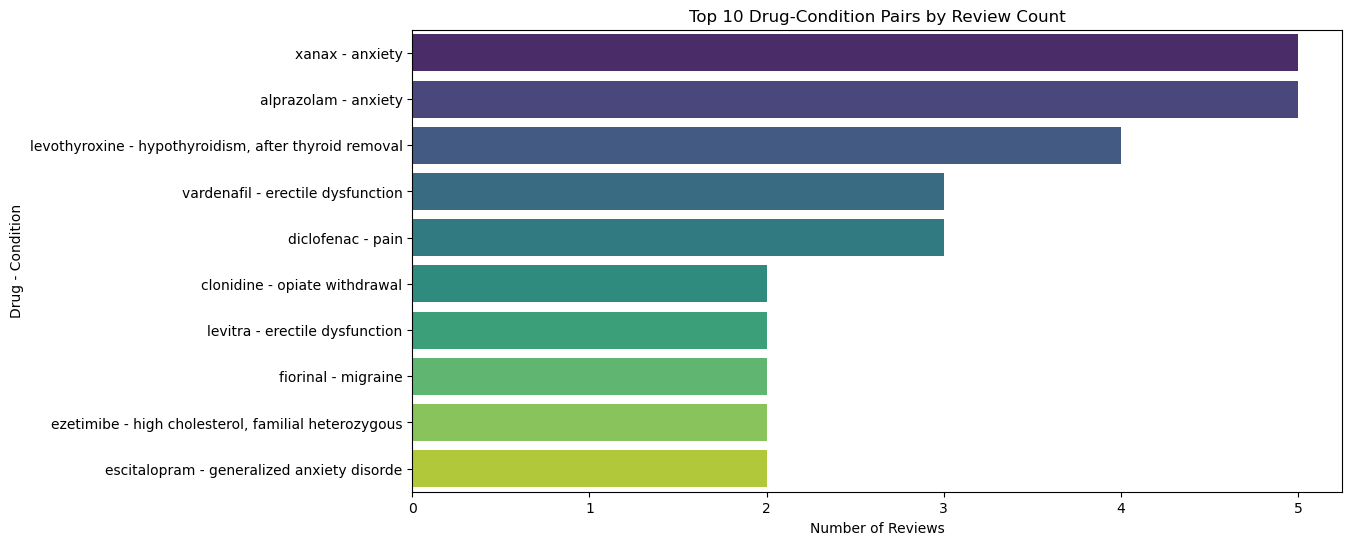

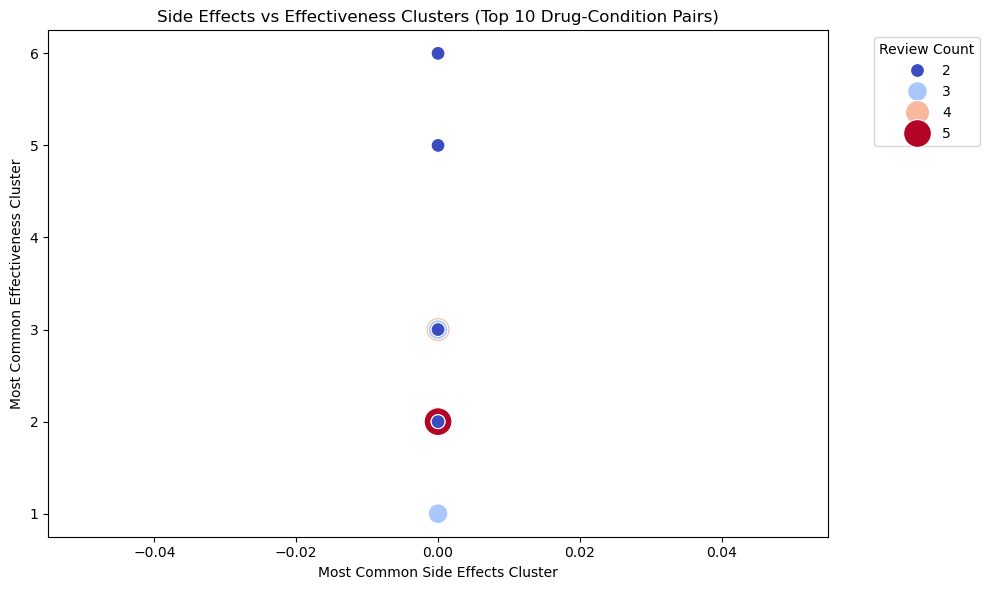

In [176]:
# to get the drug been used for the condition
group_drugCondition['drug_condition'] = group_drugCondition['drugName'] + " - " + group_drugCondition['condition']

# get the top 10 drug-condition pairs by review count
top10 = group_drugCondition.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')
plt.title('Top 10 Drug-Condition Pairs by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug - Condition')
plt.show()

# Scatter plot side effects vs effectiveness clusters for top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top10,
                x='most_common_side_effects',
                y='most_common_effectiveness',
                size='review_count',
                hue='review_count',
                palette='coolwarm',
                sizes=(100, 400),
                legend='brief')

plt.title('Side Effects vs Effectiveness Clusters (Top 10 Drug-Condition Pairs)')
plt.xlabel('Most Common Side Effects Cluster')
plt.ylabel('Most Common Effectiveness Cluster')
plt.legend(title='Review Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [177]:
# analyze how rating and usefulness vary across side effect and effectiveness clusters for each drug
grouped = drug_reviews_tfidf_positive.groupby(['drugName', 'side_effects_labels', 'effectiveness_labels']).agg(
    avg_rating=('rating', 'mean'),
    total_useful=('usefulCount', 'sum'),
).reset_index()

# sort the grouped data by average rating and total useful count
grouped = grouped.sort_values(by=['total_useful'], ascending=False)
grouped.head(15)

,drugName,side_effects_labels,effectiveness_labels,avg_rating,total_useful
228,oxycodone,0,3,10.0,113
230,oxycontin,0,3,10.0,113
193,metformin,1,3,10.0,107
283,staxyn,0,1,10.0,105
314,vardenafil,0,1,10.0,105
229,oxycodone,0,6,9.5,99
231,oxycontin,0,6,9.5,99
201,milnacipran,1,3,9.0,95
271,savella,1,3,9.0,95
94,clonidine,0,7,6.0,93


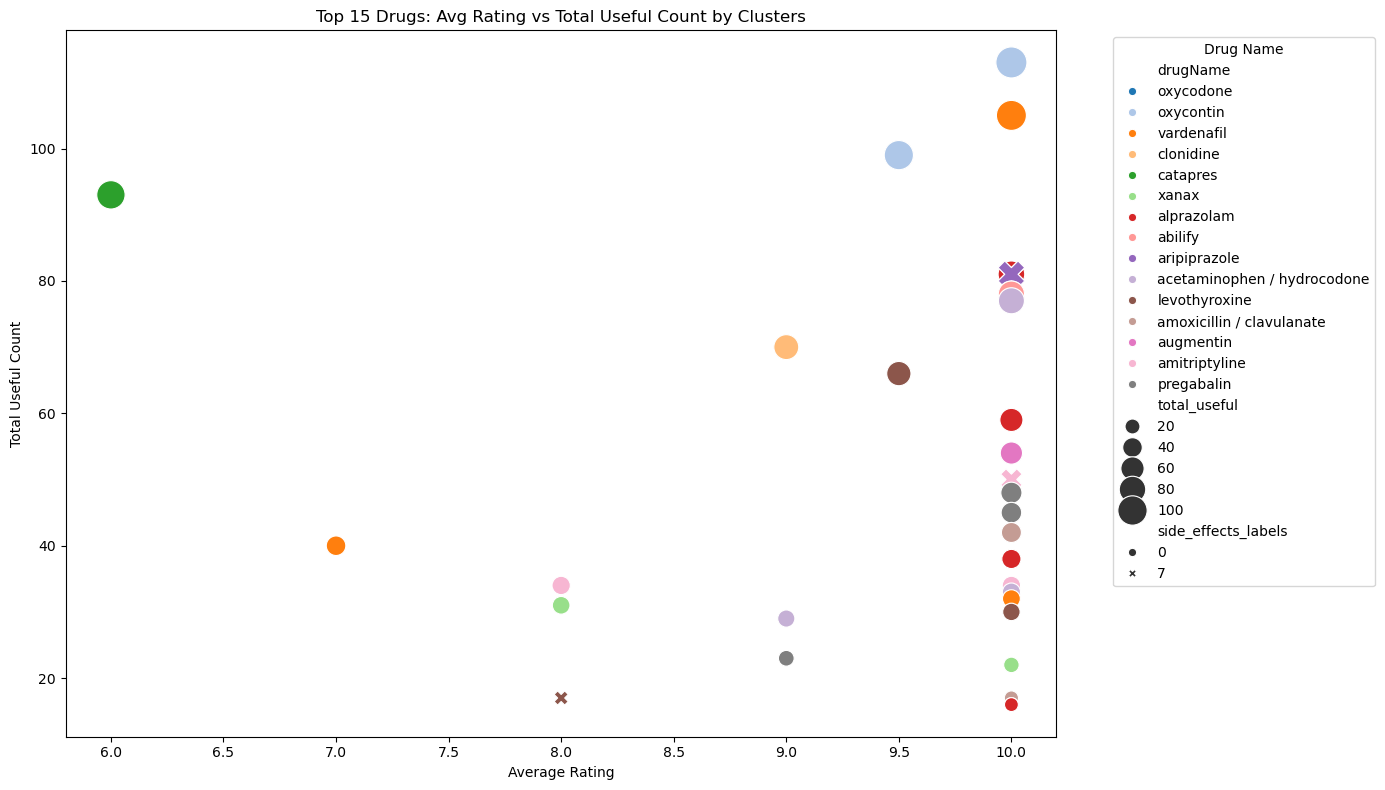

In [181]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='side_effects_labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


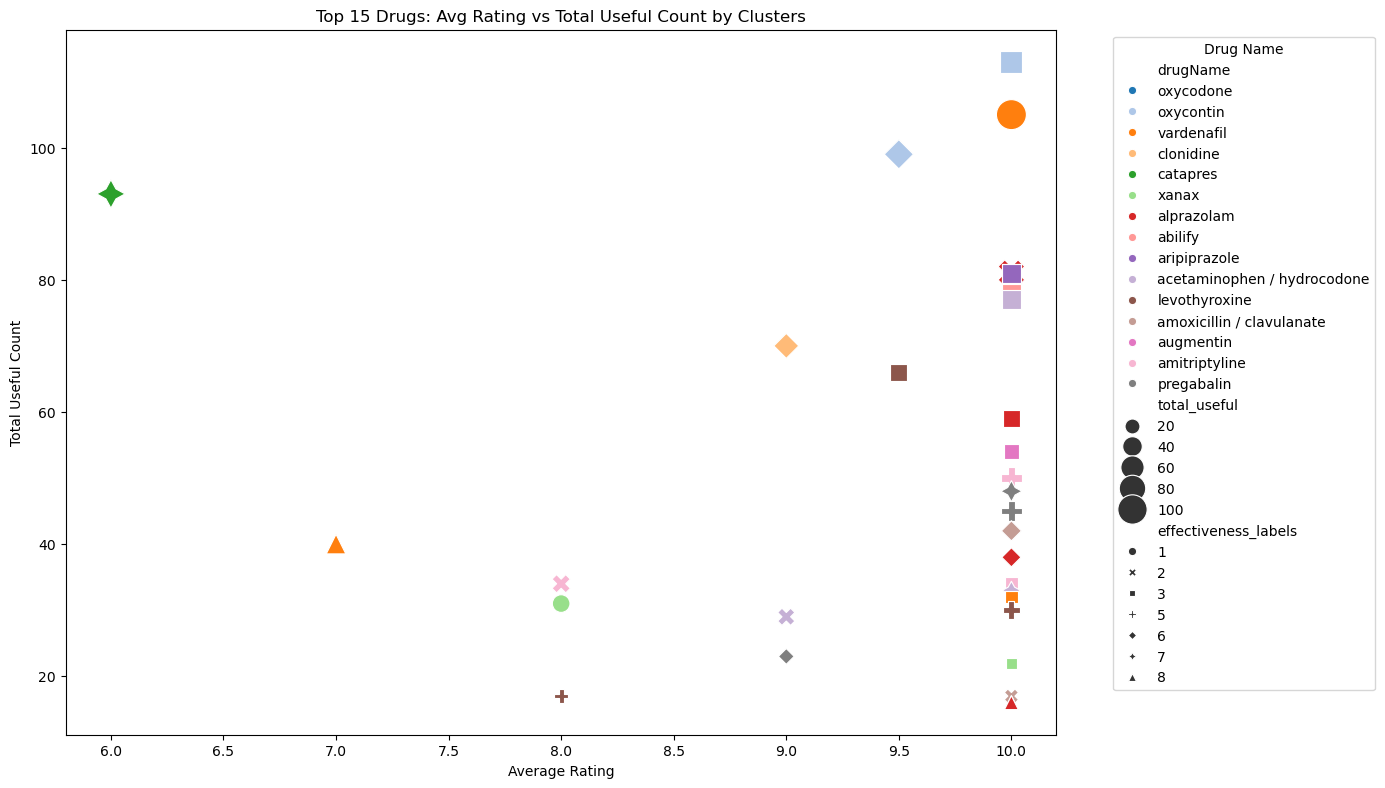

In [186]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='effectiveness_labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


## **Negative**

In [187]:
# filter the outliers
drug_reviews_tfidf_negative = drug_reviews_tfidf_negative[
    (drug_reviews_tfidf_negative['side_effects_labels'] != -1) &
    (drug_reviews_tfidf_negative['effectiveness_labels'] != -1)
]

drug_reviews_tfidf_negative = drug_reviews_tfidf_negative[['drugName', 'condition', 'rating', 'usefulCount', 'side effects', 'side_effects_labels', 'effectiveness', 'effectiveness_labels']].reset_index(drop=True)
drug_reviews_tfidf_negative.head()

,drugName,condition,rating,usefulCount,side effects,side_effects_labels,effectiveness,effectiveness_labels
0,restasis,keratoconjunctivitis sicca,9,39,no side effects reported,0,effective,1
1,myrbetriq,overactive bladde,10,46,no side effects reported,0,does work,2
2,acetaminophen / hydrocodone,pain,9,92,no side effects reported,0,worked pain,5
3,spiriva,"copd, maintenance",8,17,no side effects reported,0,it works for me too many blanks 4 out of 10 ar...,0
4,viagra,erectile dysfunction,9,48,no side effects reported,0,works well,2


In [188]:
# group the data by drugName and condition, and aggregate the most common side effects and effectiveness labels
group_drugCondition = drug_reviews_tfidf_negative.groupby(['drugName', 'condition']).agg(

    # return the side effects with the most common label
    most_common_side_effects=('side_effects_labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    # return the effectiveness with the most common label
    most_common_effectiveness=('effectiveness_labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),

    # count the number of reviews for each drug
    review_count=('drugName', 'size')  

).reset_index()

group_drugCondition = group_drugCondition.sort_values(by='review_count', ascending=False)
group_drugCondition.head(10)

,drugName,condition,most_common_side_effects,most_common_effectiveness,review_count
45,tiotropium,"copd, maintenance",0,0,2
42,spiriva,"copd, maintenance",0,0,2
0,acetaminophen / hydrocodone,pain,0,5,1
39,sildenafil,erectile dysfunction,0,2,1
29,myrbetriq,overactive bladde,0,2,1
30,naltrexone,alcohol dependence,0,4,1
31,norco,pain,0,5,1
32,nuvigil,depression,0,3,1
33,plecanatide,chronic idiopathic constipation,4,0,1
34,polyethylene glycol 3350 with electrolytes,bowel preparation,0,0,1


C:\Users\User\AppData\Local\Temp\ipykernel_45616\3943053413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')


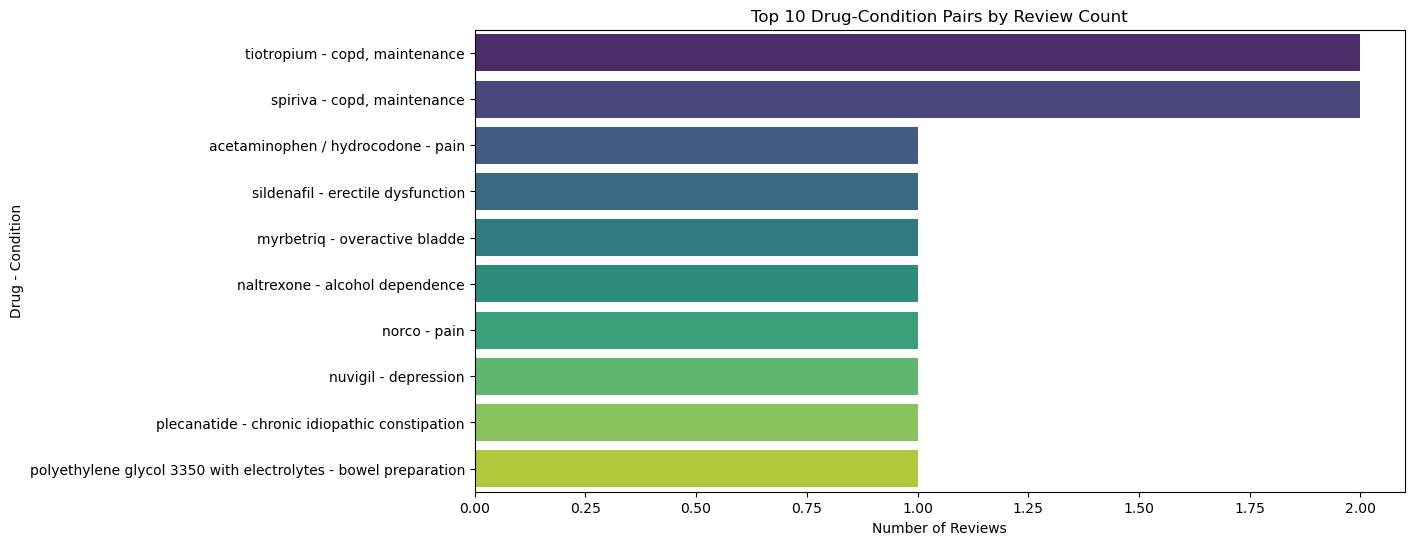

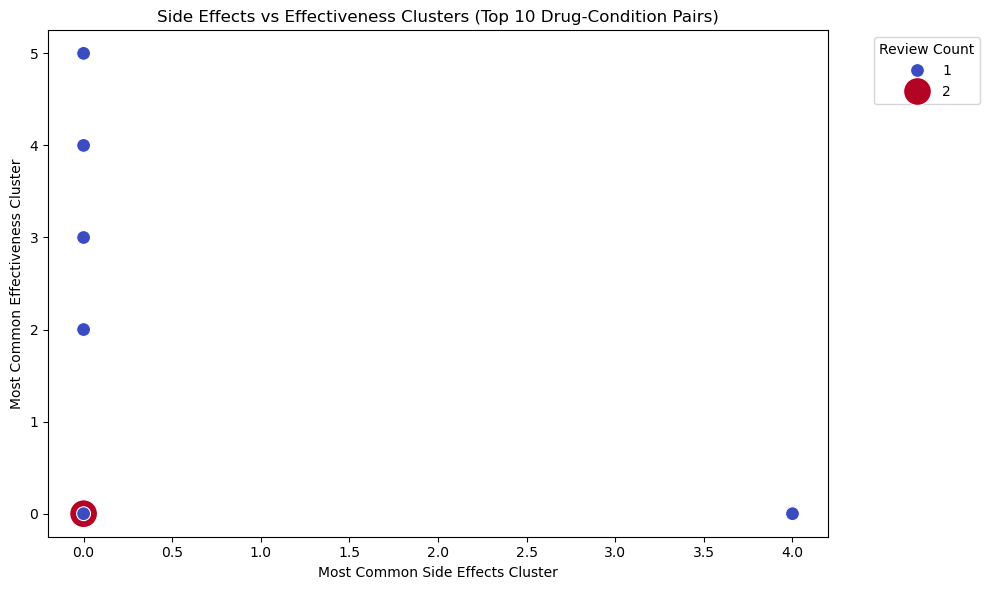

In [189]:
# to get the drug been used for the condition
group_drugCondition['drug_condition'] = group_drugCondition['drugName'] + " - " + group_drugCondition['condition']

# get the top 10 drug-condition pairs by review count
top10 = group_drugCondition.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')
plt.title('Top 10 Drug-Condition Pairs by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug - Condition')
plt.show()

# Scatter plot side effects vs effectiveness clusters for top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top10,
                x='most_common_side_effects',
                y='most_common_effectiveness',
                size='review_count',
                hue='review_count',
                palette='coolwarm',
                sizes=(100, 400),
                legend='brief')

plt.title('Side Effects vs Effectiveness Clusters (Top 10 Drug-Condition Pairs)')
plt.xlabel('Most Common Side Effects Cluster')
plt.ylabel('Most Common Effectiveness Cluster')
plt.legend(title='Review Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [190]:
# analyze how rating and usefulness vary across side effect and effectiveness clusters for each drug
grouped = drug_reviews_tfidf_negative.groupby(['drugName', 'side_effects_labels', 'effectiveness_labels']).agg(
    avg_rating=('rating', 'mean'),
    total_useful=('usefulCount', 'sum'),
).reset_index()

# sort the grouped data by average rating and total useful count
grouped = grouped.sort_values(by=['total_useful'], ascending=False)
grouped.head(15)

,drugName,side_effects_labels,effectiveness_labels,avg_rating,total_useful
17,fluoxetine,0,3,10.0,107
36,prozac,0,3,10.0,107
38,robaxin,0,0,7.0,106
41,sotalol,0,0,10.0,105
0,acetaminophen / hydrocodone,0,5,9.0,92
31,norco,0,5,9.0,92
4,aripiprazole,1,3,7.0,91
30,naltrexone,0,4,9.0,76
28,mobic,0,2,10.0,75
24,meloxicam,0,2,10.0,75


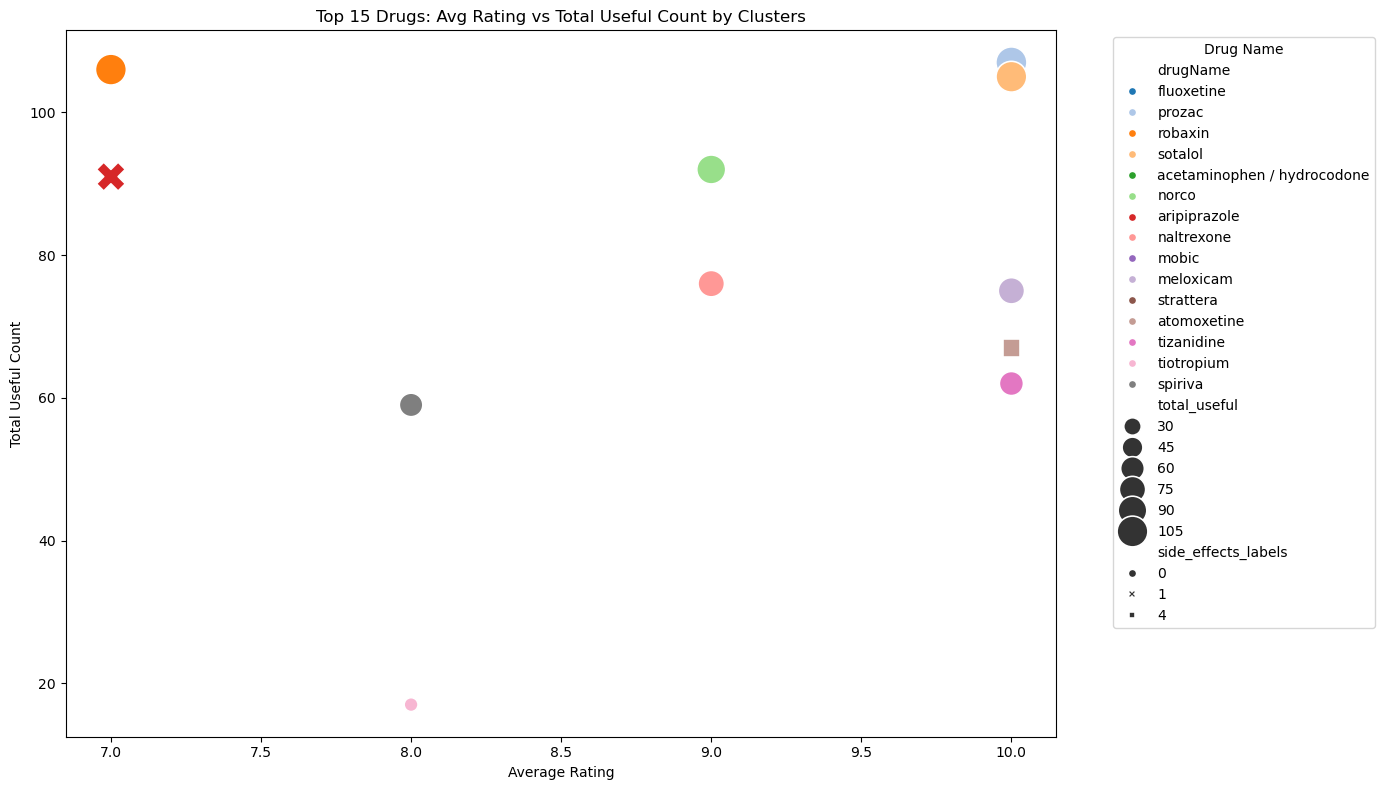

In [191]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='side_effects_labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


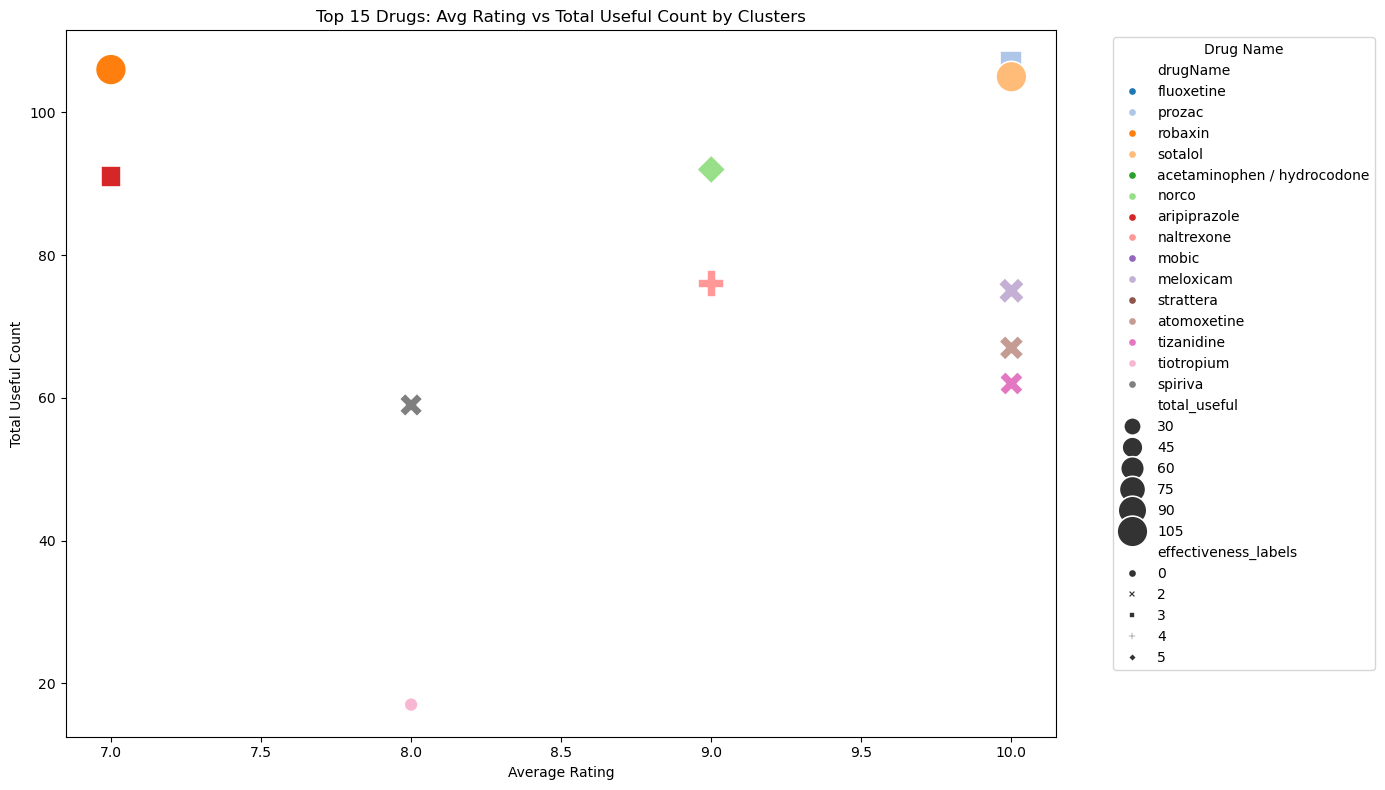

In [192]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='effectiveness_labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


# **Visualized on Text Embedding Result**

## **Positive**

In [195]:
# filter the outliers
drug_reviews_embeddings_positive = drug_reviews_embeddings_positive[
    (drug_reviews_embeddings_positive['side effects labels'] != -1) &
    (drug_reviews_embeddings_positive['effectiveness labels'] != -1)
]

drug_reviews_embeddings_positive = drug_reviews_embeddings_positive[['drugName', 'condition', 'rating', 'usefulCount', 'side effects', 'side effects labels', 'effectiveness', 'effectiveness labels']].reset_index(drop=True)
drug_reviews_embeddings_positive.head()

,drugName,condition,rating,usefulCount,side effects,side effects labels,effectiveness,effectiveness labels
0,tiotropium,"copd, maintenance",6,39,no side effects reported,0,no effectiveness information,1
1,temazepam,insomnia,10,22,no side effects reported,0,works great works well,0
2,halcion,insomnia,10,36,no side effects reported,0,works great,0
3,mysoline,seizures,10,21,no side effects reported,0,great,2
4,qsymia,weight loss,8,18,no side effects reported,0,worked great,0


In [197]:
# group the data by drugName and condition, and aggregate the most common side effects and effectiveness labels
group_drugCondition = drug_reviews_embeddings_positive.groupby(['drugName', 'condition']).agg(

    # return the side effects with the most common label
    most_common_side_effects=('side effects labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    # return the effectiveness with the most common label
    most_common_effectiveness=('effectiveness labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),

    # count the number of reviews for each drug
    review_count=('drugName', 'size')  

).reset_index()

group_drugCondition = group_drugCondition.sort_values(by='review_count', ascending=False)
group_drugCondition.head(10)

,drugName,condition,most_common_side_effects,most_common_effectiveness,review_count
14,alprazolam,anxiety,0,0,4
199,xanax,anxiety,0,3,3
128,oxycodone,chronic pain,0,0,3
160,sildenafil,erectile dysfunction,0,0,3
57,diclofenac,pain,0,0,3
37,carisoprodol,muscle spasm,0,0,2
130,oxycontin,chronic pain,0,0,2
131,oxycontin,pain,0,0,2
94,levothyroxine,"hypothyroidism, after thyroid removal",0,0,2
93,levofloxacin,urinary tract infection,0,0,2


C:\Users\User\AppData\Local\Temp\ipykernel_45616\3943053413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')


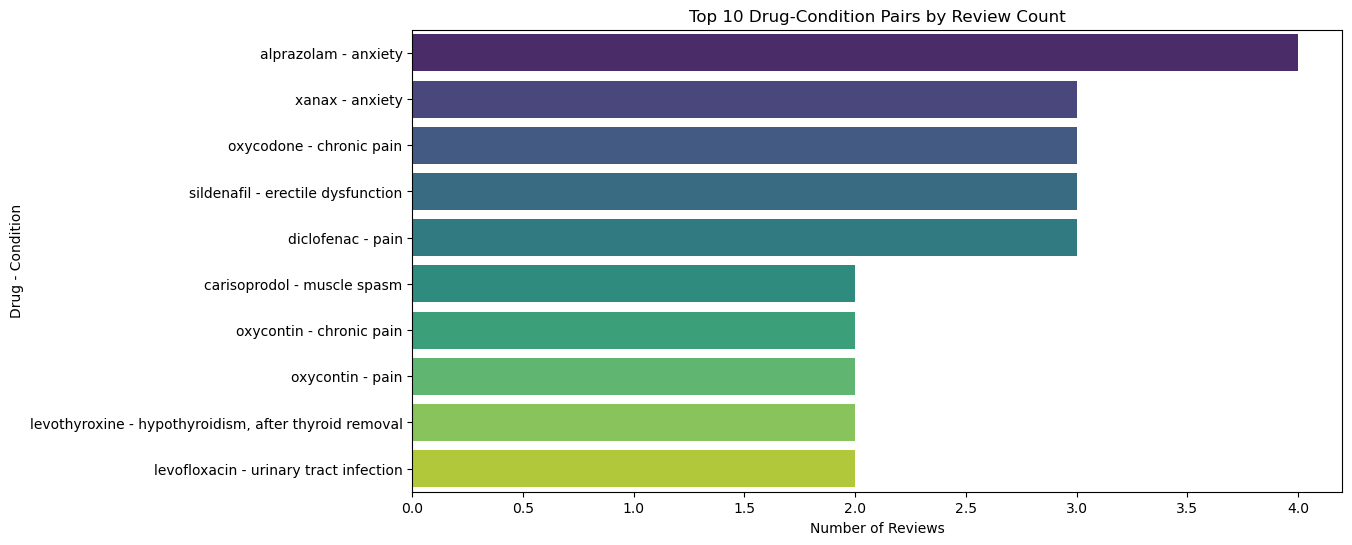

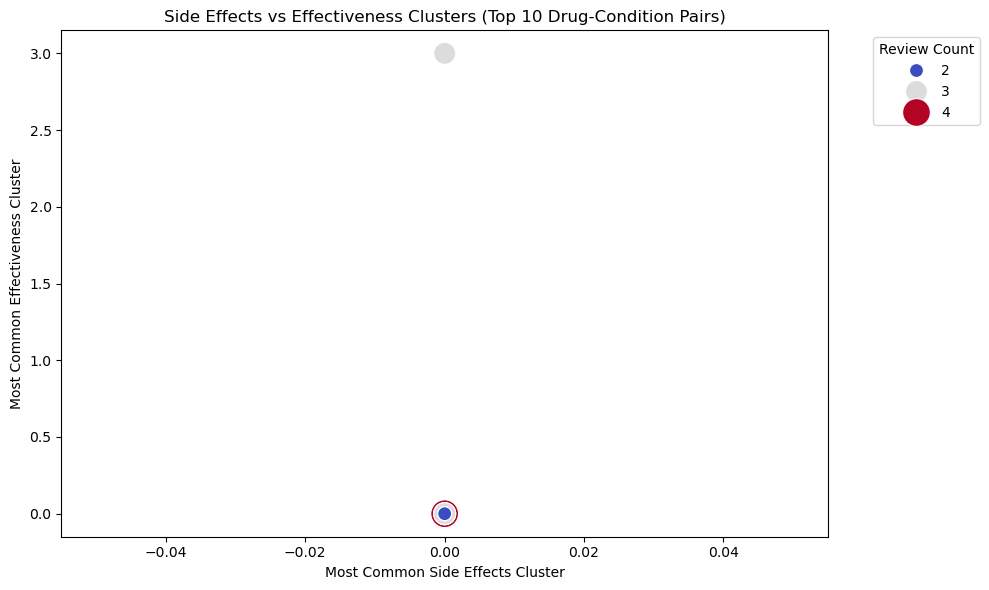

In [198]:
# to get the drug been used for the condition
group_drugCondition['drug_condition'] = group_drugCondition['drugName'] + " - " + group_drugCondition['condition']

# get the top 10 drug-condition pairs by review count
top10 = group_drugCondition.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')
plt.title('Top 10 Drug-Condition Pairs by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug - Condition')
plt.show()

# Scatter plot side effects vs effectiveness clusters for top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top10,
                x='most_common_side_effects',
                y='most_common_effectiveness',
                size='review_count',
                hue='review_count',
                palette='coolwarm',
                sizes=(100, 400),
                legend='brief')

plt.title('Side Effects vs Effectiveness Clusters (Top 10 Drug-Condition Pairs)')
plt.xlabel('Most Common Side Effects Cluster')
plt.ylabel('Most Common Effectiveness Cluster')
plt.legend(title='Review Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [199]:
# analyze how rating and usefulness vary across side effect and effectiveness clusters for each drug
grouped = drug_reviews_embeddings_positive.groupby(['drugName', 'side effects labels', 'effectiveness labels']).agg(
    avg_rating=('rating', 'mean'),
    total_useful=('usefulCount', 'sum'),
).reset_index()

# sort the grouped data by average rating and total useful count
grouped = grouped.sort_values(by=['total_useful'], ascending=False)
grouped.head(15)

,drugName,side effects labels,effectiveness labels,avg_rating,total_useful
139,oxycodone,0,0,9.333333,200
141,oxycontin,0,0,10.000000,158
120,metformin,1,0,10.000000,107
172,sildenafil,0,0,10.000000,106
142,oxycontin,0,2,9.500000,99
140,oxycodone,0,2,9.500000,99
168,savella,1,0,9.000000,95
203,viagra,0,0,10.000000,87
16,alprazolam,0,3,10.000000,81
216,xanax,0,3,10.000000,81


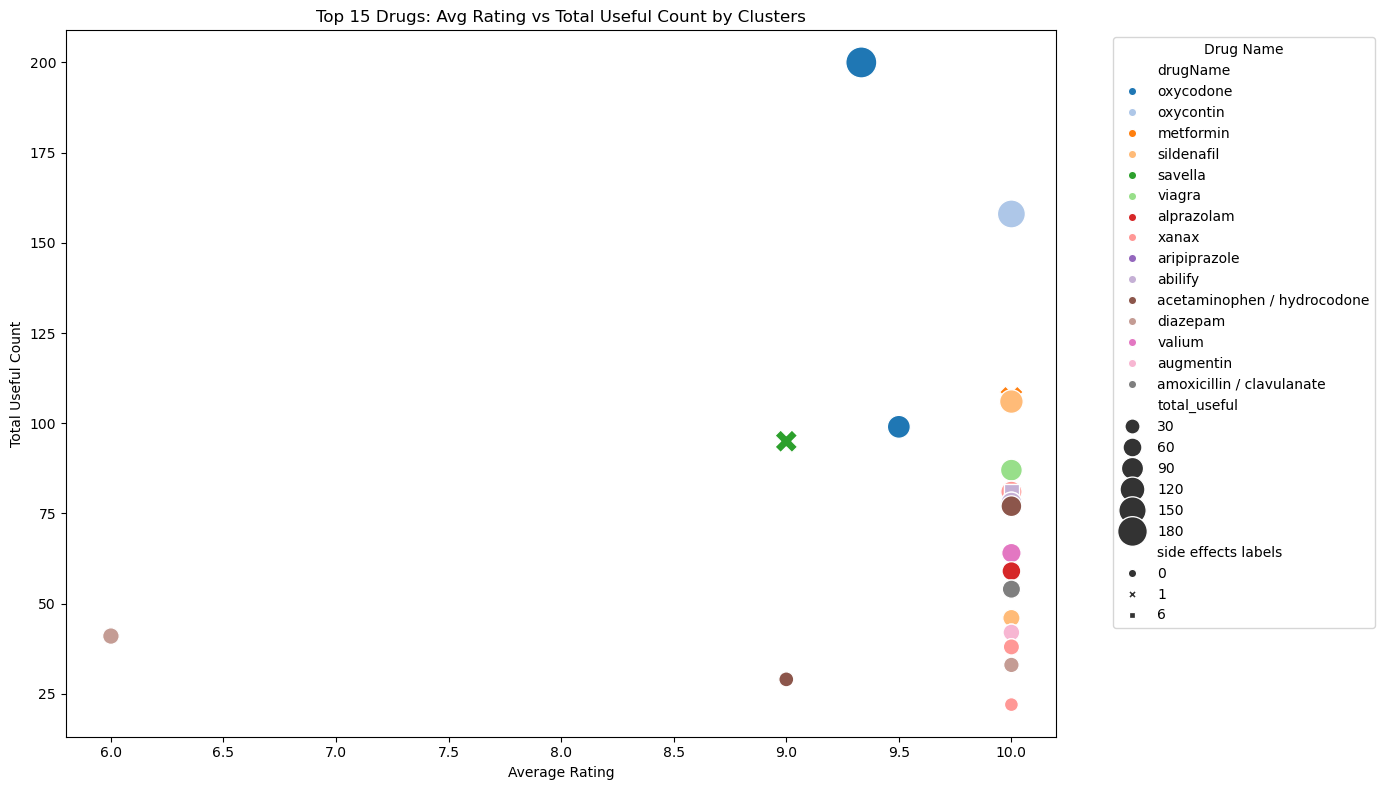

In [201]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='side effects labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


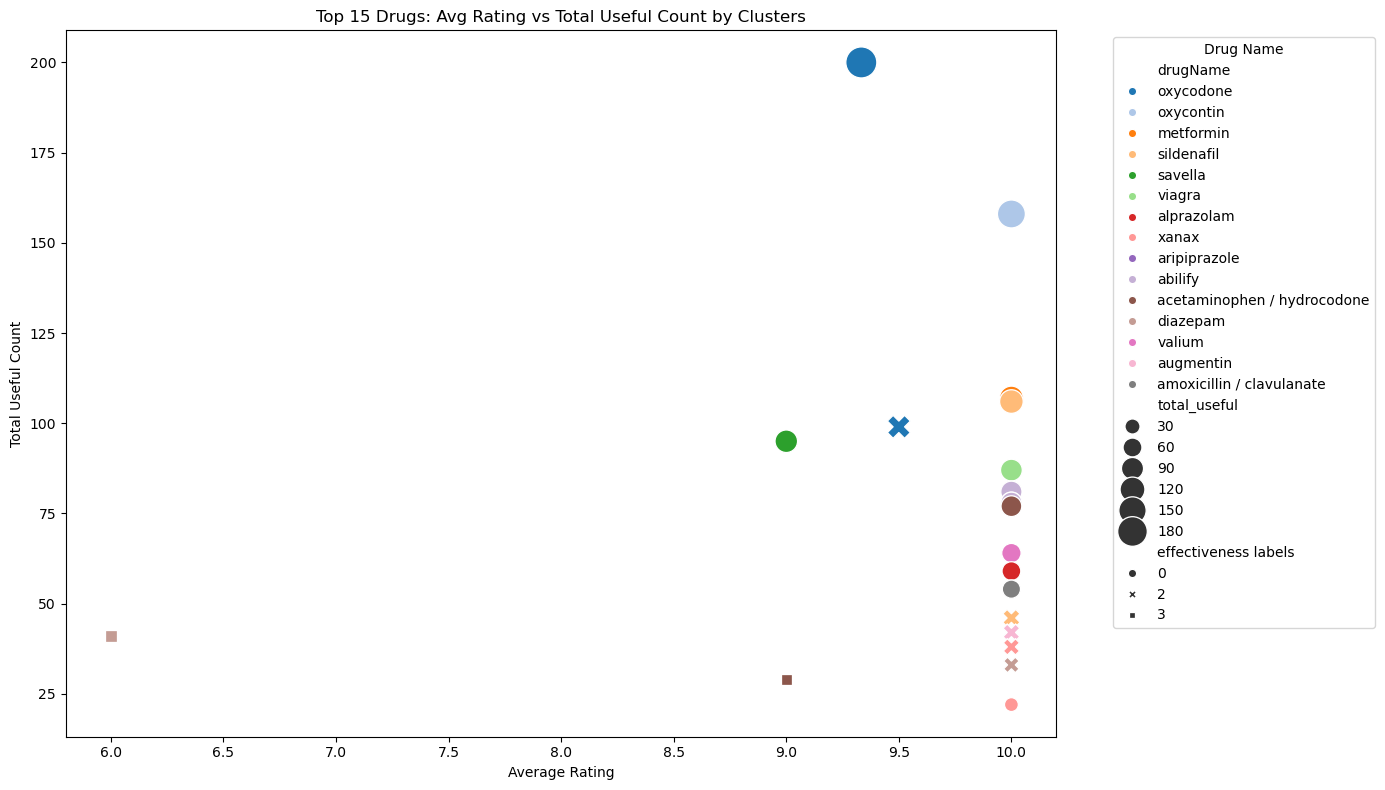

In [202]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='effectiveness labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


## **Negative**

In [204]:
# filter the outliers
drug_reviews_embeddings_negative = drug_reviews_embeddings_negative[
    (drug_reviews_embeddings_negative['side effect labels'] != -1) &
    (drug_reviews_embeddings_negative['effectiveness labels'] != -1)
]

drug_reviews_embeddings_negative = drug_reviews_embeddings_negative[['drugName', 'condition', 'rating', 'usefulCount', 'side effects', 'side effect labels', 'effectiveness', 'effectiveness labels']].reset_index(drop=True)
drug_reviews_embeddings_negative.head()

,drugName,condition,rating,usefulCount,side effects,side effect labels,effectiveness,effectiveness labels
0,viagra,erectile dysfunction,9,48,no side effects reported,0,works well,1
1,duloxetine,depression,9,55,no side effects reported,0,helped with depression helped with anxiety mor...,2
2,sotalol,atrial fibrillation,10,105,no side effects reported,0,no effectiveness information,0
3,norco,pain,10,58,no side effects reported,0,worked very well do the trick,1
4,asenapine,bipolar disorde,10,48,no side effects reported,0,helped with feelings of anxiety helped with fe...,2


In [205]:
# group the data by drugName and condition, and aggregate the most common side effects and effectiveness labels
group_drugCondition = drug_reviews_embeddings_negative.groupby(['drugName', 'condition']).agg(

    # return the side effects with the most common label
    most_common_side_effects=('side effect labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    # return the effectiveness with the most common label
    most_common_effectiveness=('effectiveness labels', lambda x: x.mode().iloc[0] if not x.mode().empty else None),

    # count the number of reviews for each drug
    review_count=('drugName', 'size')  

).reset_index()

group_drugCondition = group_drugCondition.sort_values(by='review_count', ascending=False)
group_drugCondition.head(10)

,drugName,condition,most_common_side_effects,most_common_effectiveness,review_count
7,duloxetine,depression,0,2,3
0,acetaminophen / hydrocodone,pain,0,1,1
12,polyethylene glycol 3350 with electrolytes,bowel preparation,0,0,1
20,viagra,erectile dysfunction,0,1,1
19,tiotropium,"copd, maintenance",0,1,1
18,spiriva,"copd, maintenance",0,1,1
17,sotalol,atrial fibrillation,0,0,1
16,sildenafil,erectile dysfunction,0,1,1
15,saphris,bipolar disorde,0,2,1
14,robaxin,opiate withdrawal,0,0,1


C:\Users\User\AppData\Local\Temp\ipykernel_45616\3943053413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')


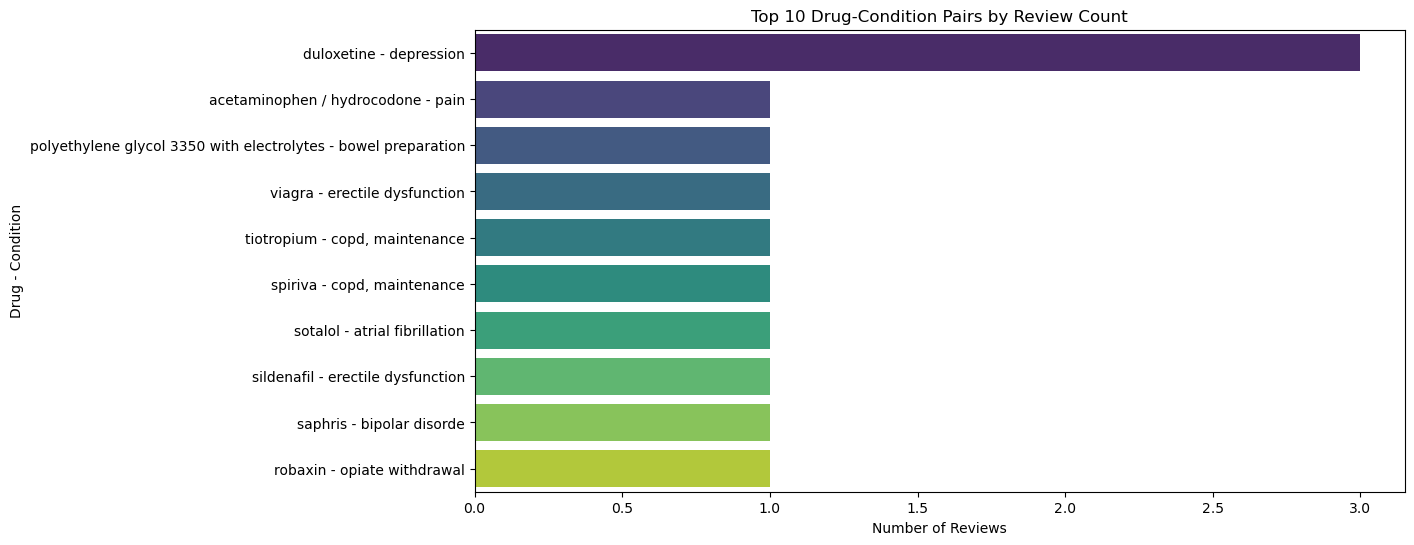

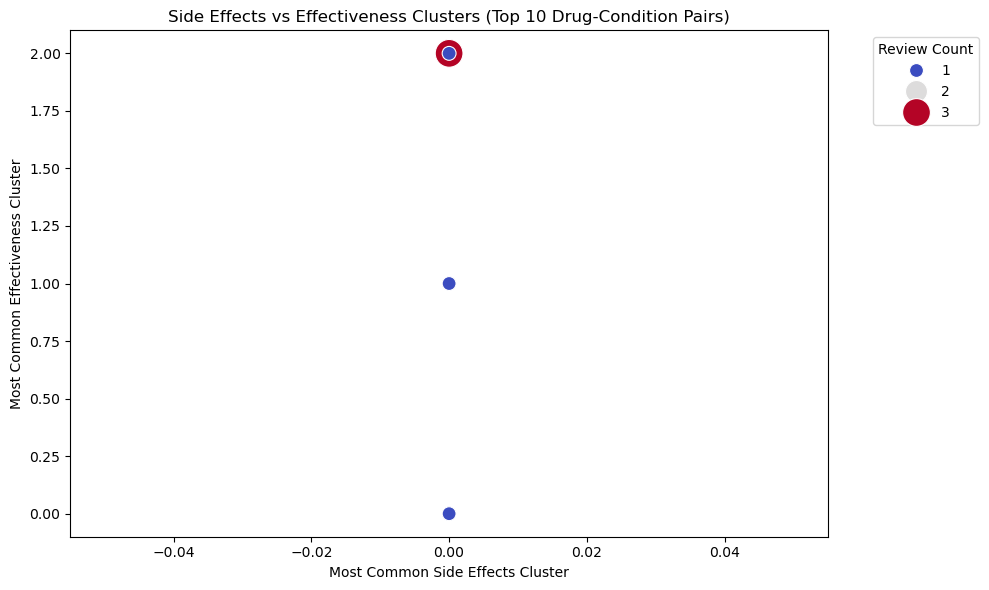

In [206]:
# to get the drug been used for the condition
group_drugCondition['drug_condition'] = group_drugCondition['drugName'] + " - " + group_drugCondition['condition']

# get the top 10 drug-condition pairs by review count
top10 = group_drugCondition.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='review_count', y='drug_condition', palette='viridis')
plt.title('Top 10 Drug-Condition Pairs by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug - Condition')
plt.show()

# Scatter plot side effects vs effectiveness clusters for top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top10,
                x='most_common_side_effects',
                y='most_common_effectiveness',
                size='review_count',
                hue='review_count',
                palette='coolwarm',
                sizes=(100, 400),
                legend='brief')

plt.title('Side Effects vs Effectiveness Clusters (Top 10 Drug-Condition Pairs)')
plt.xlabel('Most Common Side Effects Cluster')
plt.ylabel('Most Common Effectiveness Cluster')
plt.legend(title='Review Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [207]:
# analyze how rating and usefulness vary across side effect and effectiveness clusters for each drug
grouped = drug_reviews_embeddings_negative.groupby(['drugName', 'side effect labels', 'effectiveness labels']).agg(
    avg_rating=('rating', 'mean'),
    total_useful=('usefulCount', 'sum'),
).reset_index()

# sort the grouped data by average rating and total useful count
grouped = grouped.sort_values(by=['total_useful'], ascending=False)
grouped.head(15)

,drugName,side effect labels,effectiveness labels,avg_rating,total_useful
7,duloxetine,0,2,9.5,131
14,robaxin,0,0,7.0,106
17,sotalol,0,0,10.0,105
11,norco,0,1,10.0,96
1,aripiprazole,1,2,7.0,91
21,wellbutrin xl,0,1,10.0,85
3,bupropion,0,1,10.0,85
6,cymbalta,0,2,10.0,76
5,buspirone,7,2,8.0,69
4,buspar,7,2,8.0,69


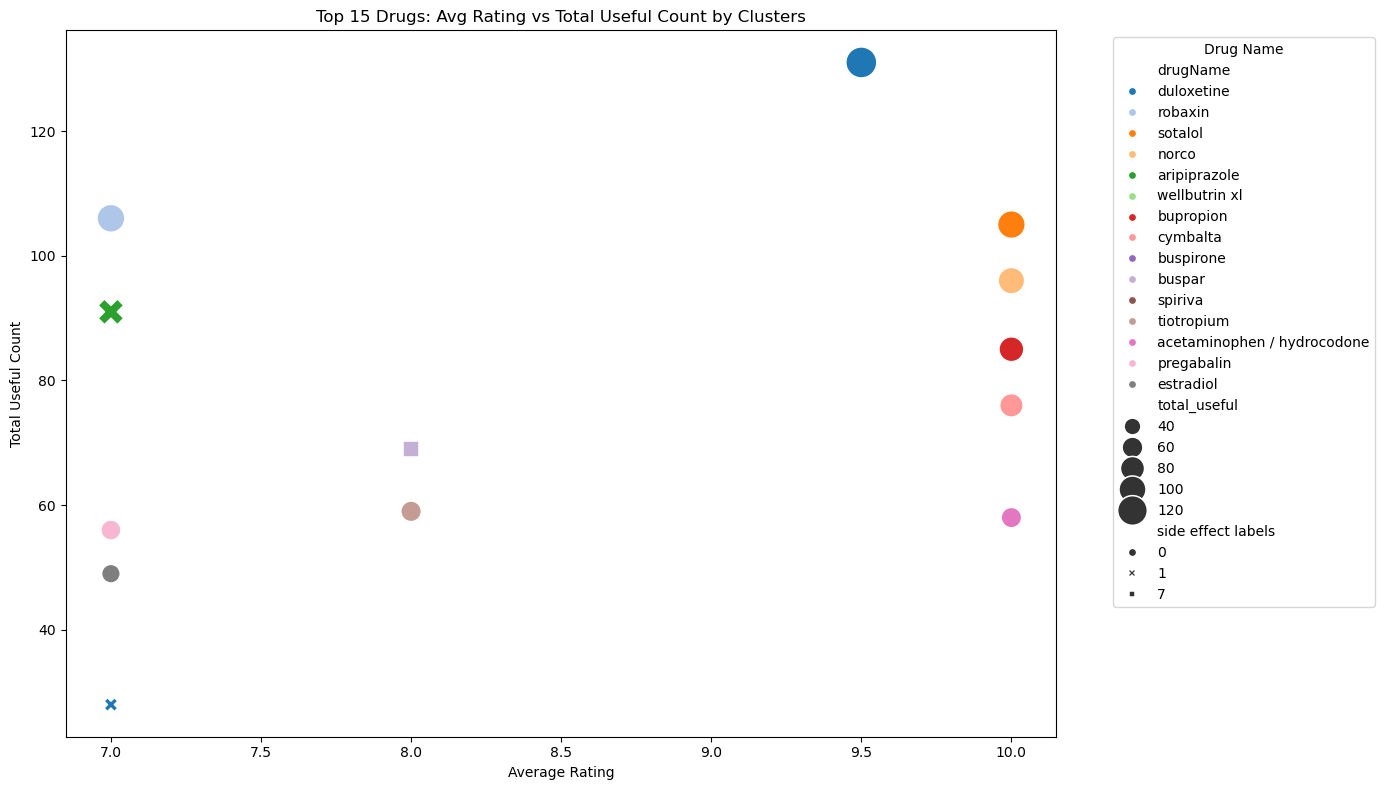

In [209]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='side effect labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()


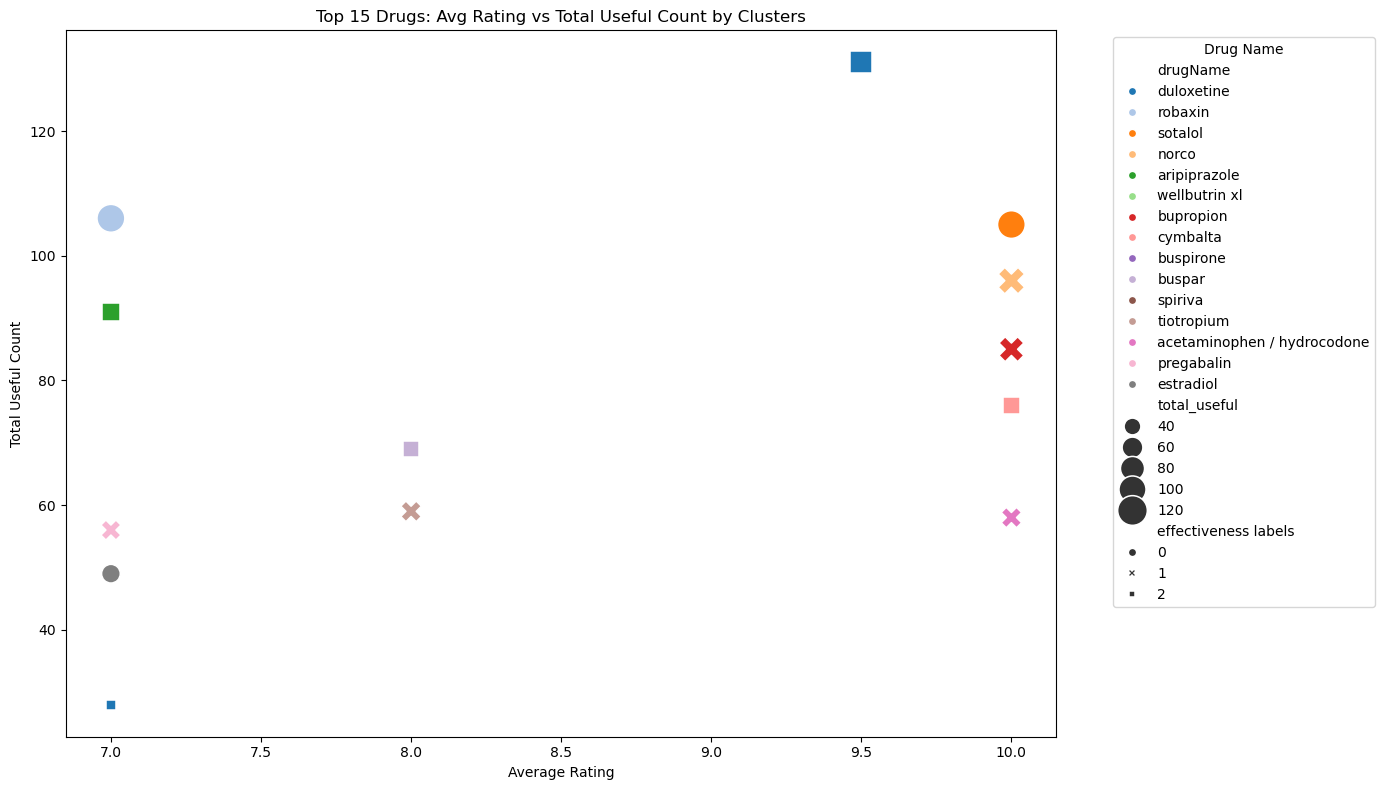

In [210]:
# top 15 drugs based on total usefulness
top_drugs = (
    grouped.groupby('drugName')['total_useful']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# filter original grouped data to include only those top 15 drugs
top15 = grouped[grouped['drugName'].isin(top_drugs)]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top15,
    x='avg_rating',
    y='total_useful',
    hue='drugName',
    size='total_useful',
    sizes=(100, 500),
    style='effectiveness labels',
    palette='tab20'
)
plt.title('Top 15 Drugs: Avg Rating vs Total Useful Count by Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Useful Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Drug Name')
plt.tight_layout()
plt.show()
